<a href="https://colab.research.google.com/github/worldterminator/worldterminator/blob/main/ps3%264(Yachun%26Citlalli).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import data_table
data_table.enable_dataframe_formatter() #this allows nice sortable spreadsheet
data_table.max_columns = 50

:aok: guys, use text fields like this one, thats why we have notebook

lucy: ok, feedback corporeated—will take advantge of the indicator to check the merging and use more subsections

<br>also great you work as group but then also keep in mind that the bar is 2x higher


~For ps 3 we did two projects. one is on ED as the primary varaible of interest and I added in a few more datasets, and the other one looks at school districts.

lucy: fix atlantic missing values (thx professor!), drop two irrelavant rows (unknown residence/NJ totals) from ps2 merged dataset. in this ps I made sure to name the merging by more meaningful and identifable names.

See codes and explanations for each project below.

aok oct24:

nice to have sections and celarly separate the 2 projects

slow down; subset like eg you did with just camden--easier that way

#PS3: School Project

Cit: we merged two data sources from lucy's PS1 (enrollment from 2020-2021, and a geographical supplmentary file). This initial merging of the first two data sets created a new and useful dataset that assigned a geographical location to charterschools in NJ. And we merged in a new column containing district means extracted from a very large 2021 annual data file https://www.nj.gov/education/assessment/results/reports/2122/index.shtml on statewide assessment for grade 9 students around NJ.

This is of interests to us as we are currently working with a Camden Charter School and hope to explore the relative standing of it among adjacent schools.

Public schools (charter schools were not assigned a district name by their own school names) could potentially serve as counterparts so we could estimate the effect of being enrolled in that particular charter school.

lucy: we'll merge in more years of data if needed in the future, but that would depend on bit on data coming from the Charter School we're working with (to determine a time range and model trends). but the current dataset, looking at one year only, could be used towards correlational tests on ELA scores and demographic composition and poverty indicator already.

### merging 2 old datasets

In [ ]:
import pandas as pd
DistrictInfo=pd.read_excel('https://github.com/worldterminator/worldterminator/raw/main/Districts%20and%20Counties.xlsx')
DistrictInfo.head()
DistrictInfo.columns

Index(['County\nCode', 'County Name', 'District\nCode', 'District Name',
       'District Web address'],
      dtype='object')

In [ ]:
DistrictInfo.rename(columns={'County\nCode': 'County Code'}, inplace=True)
DistrictInfo.rename(columns={'District\nCode': 'District Code'}, inplace=True)
print(DistrictInfo)

     County Code County Name  District Code  \
0            1.0    Atlantic           10.0   
1            1.0    Atlantic          110.0   
2            1.0    Atlantic          125.0   
3            1.0    Atlantic          120.0   
4            1.0    Atlantic          570.0   
..           ...         ...            ...   
690         80.0       Union         6101.0   
691         80.0       Union         6033.0   
692         80.0       Union         7600.0   
693         80.0       Union         8010.0   
694         80.0      Warren         7727.0   

                                        District Name  \
0                     Absecon Public Schools District   
1                Atlantic City Public School District   
2    Atlantic County Special Services School District   
3          Atlantic County Vocational School District   
4                           Brigantine Public Schools   
..                                                ...   
690            College Achieve Centr

In [ ]:
DistrictInfo #i like this output better than above

,County Code,County Name,District Code,District Name,District Web address
0,1.0,Atlantic,10,Absecon Public Schools District,http://www.edline.net/pages/abseconschooldistrict
1,1.0,Atlantic,110,Atlantic City Public School District,http://www.acboe.org
2,1.0,Atlantic,125,Atlantic County Special Services School District,http://www.acsssd.net
3,1.0,Atlantic,120,Atlantic County Vocational School District,http://www.acitech.org
4,1.0,Atlantic,570,Brigantine Public Schools,http://www.brigantineschools.org
...,...,...,...,...,...
690,80.0,Union,6101,College Achieve Central Charter School,http://www.collegeachieve.org
691,80.0,Union,6033,The Barack Obama Green Charter High School,http://www.obamagreencharter.org
692,80.0,Union,7600,The Queen City Academy Charter School,http://www.queencity.edu
693,80.0,Union,8010,Union County Teams Charter School,http://www.ucteams.org


In [ ]:
import numpy as np
DistrictInfo['County Code']=DistrictInfo['County Code'].replace(-1, np.nan) #guys i guess you were trying to do this

In [ ]:
DistrictInfo['County Code'] = DistrictInfo['County Code'].fillna(-1)
DistrictInfo['County Code'] = DistrictInfo['County Code'].astype(int)
print(DistrictInfo.head())
# Citlalli: didn't work lets try another way (the next cell)

   County Code County Name  District Code  \
0            1    Atlantic             10   
1            1    Atlantic            110   
2            1    Atlantic            125   
3            1    Atlantic            120   
4            1    Atlantic            570   

                                      District Name  \
0                   Absecon Public Schools District   
1              Atlantic City Public School District   
2  Atlantic County Special Services School District   
3        Atlantic County Vocational School District   
4                         Brigantine Public Schools   

                                District Web address  
0  http://www.edline.net/pages/abseconschooldistrict  
1                               http://www.acboe.org  
2                              http://www.acsssd.net  
3                             http://www.acitech.org  
4                   http://www.brigantineschools.org  


In [ ]:
DistrictInfo['County Code'].dtypes

dtype('int64')

In [ ]:
def convert_to_int(val):
    try:
        return int(val)
    except:
        return -1
DistrictInfo['District Code'] = DistrictInfo['District Code'].apply(convert_to_int)
print(DistrictInfo.head())

   County Code County Name  District Code  \
0            1    Atlantic             10   
1            1    Atlantic            110   
2            1    Atlantic            125   
3            1    Atlantic            120   
4            1    Atlantic            570   

                                      District Name  \
0                   Absecon Public Schools District   
1              Atlantic City Public School District   
2  Atlantic County Special Services School District   
3        Atlantic County Vocational School District   
4                         Brigantine Public Schools   

                                District Web address  
0  http://www.edline.net/pages/abseconschooldistrict  
1                               http://www.acboe.org  
2                              http://www.acsssd.net  
3                             http://www.acitech.org  
4                   http://www.brigantineschools.org  


In [ ]:
# 2nd Data set relating to School districts Enrollment 2022-2021
import numpy as np
import gdown
file_id = '1aCUZ-9Yzy9zDU-XkOIyY2s10mFuhxuoR'
url = f'https://drive.google.com/uc?id={file_id}'
output_path = 'your_data.xlsx'
gdown.download(url, output_path, quiet=False)
District_enrollment = pd.read_excel(output_path)
District_enrollment.head()

Downloading...
From: https://drive.google.com/uc?id=1aCUZ-9Yzy9zDU-XkOIyY2s10mFuhxuoR
To: /content/your_data.xlsx
100%|██████████| 134k/134k [00:00<00:00, 41.5MB/s]


,County Code,County Name,District Code,District Name,Total Enrollment,White,%White,Black,%Black,Hispanic,...,Tenth Grade,Eleventh Grade,Twelfth Grade,Ungraded,%Free Lunch,%Reduced Lunch,%English Learners,%Migrant,%Military,%Homeless
0,01,Atlantic,10.0,Absecon Public Schools District,887.0,447.0,50.4,133.0,15.0,208.0,...,0.0,0.0,0.0,25.0,40.8,5.9,8.7,0.0,0.8,0.2
1,01,Atlantic,110.0,Atlantic City School District,6450.0,265.0,4.1,2147.0,33.3,2847.0,...,462.0,405.0,369.0,286.0,81.5,3.6,16.1,0.0,0.0,2.2
2,01,Atlantic,120.0,Atlantic County Vocational School District,1713.0,516.0,30.1,296.0,17.3,721.0,...,399.0,355.0,362.0,160.0,48.6,9.6,0.0,0.0,2.5,0.6
3,01,Atlantic,125.0,Atlantic County Special Services School District,306.0,95.0,31.0,82.0,26.8,108.0,...,3.0,5.0,13.0,244.0,39.5,5.9,0.3,0.0,0.3,1.0
4,01,Atlantic,570.0,Brigantine Public School District,444.0,314.0,70.7,18.0,4.1,62.0,...,0.0,0.0,0.0,12.0,33.8,8.3,3.4,0.0,2.3,0.5


In [ ]:
def convert_to_int(val): #again can just use replace
    try:
        return int(val)
    except:
        return -1
District_enrollment['District Code'] = District_enrollment['District Code'].apply(convert_to_int)
print(District_enrollment.head())

  County Code County Name  District Code  \
0          01    Atlantic             10   
1          01    Atlantic            110   
2          01    Atlantic            120   
3          01    Atlantic            125   
4          01    Atlantic            570   

                                      District Name  Total Enrollment  White  \
0                   Absecon Public Schools District             887.0  447.0   
1                     Atlantic City School District            6450.0  265.0   
2        Atlantic County Vocational School District            1713.0  516.0   
3  Atlantic County Special Services School District             306.0   95.0   
4                 Brigantine Public School District             444.0  314.0   

   %White   Black  %Black  Hispanic  ...  Tenth Grade  Eleventh Grade  \
0    50.4   133.0    15.0     208.0  ...          0.0             0.0   
1     4.1  2147.0    33.3    2847.0  ...        462.0           405.0   
2    30.1   296.0    17.3     721.0

In [ ]:
District_enrollment #aok just having look how it looks like

,County Code,County Name,District Code,District Name,District Web address
0,1.0,Atlantic,10,Absecon Public Schools District,http://www.edline.net/pages/abseconschooldistrict
1,1.0,Atlantic,110,Atlantic City Public School District,http://www.acboe.org
2,1.0,Atlantic,125,Atlantic County Special Services School District,http://www.acsssd.net
3,1.0,Atlantic,120,Atlantic County Vocational School District,http://www.acitech.org
4,1.0,Atlantic,570,Brigantine Public Schools,http://www.brigantineschools.org
...,...,...,...,...,...
690,80.0,Union,6101,College Achieve Central Charter School,http://www.collegeachieve.org
691,80.0,Union,6033,The Barack Obama Green Charter High School,http://www.obamagreencharter.org
692,80.0,Union,7600,The Queen City Academy Charter School,http://www.queencity.edu
693,80.0,Union,8010,Union County Teams Charter School,http://www.ucteams.org


In [ ]:
merged_data = pd.merge(DistrictInfo, District_enrollment, on='District Name', how='outer',indicator=True) #always do outer on first run
merged_data[['District Name','_merge']] #aok and sort on distric name to skim thru duplicates
#aok i guess may be problems!
#eg:
#Atlantic City Public School District
#Atlantic City School District

,District Name,_merge
0,Absecon Public Schools District,both
1,Atlantic City Public School District,left_only
2,Atlantic County Special Services School District,both
3,Atlantic County Vocational School District,both
4,Brigantine Public Schools,left_only
...,...,...
814,Ocean Academy Charter School,right_only
815,Achievers Early College Prep Charter School,right_only
816,Middlesex County Stem Charter School,right_only
817,Creativity Colaboratory Charter School,right_only


In [ ]:
#mergedEnrollment_Info = pd.merge(District_enrollment, DistrictInfo, how='outer', on=['District Name'],indicator=True)
#mergedEnrollment_Info

#mergedEnrollment_Info = pd.merge(DistrictInfo, District_enrollment, how='outer', on=['District Name'],indicator=True)
#mergedEnrollment_Info



In [ ]:
merged_data['District Code_x'].value_counts()

-1       109
 1830      3
 1840      3
 1820      3
 5490      3
        ... 
 2330      1
 2730      1
 3190      1
 3310      1
 7727      1
Name: District Code_x, Length: 695, dtype: int64

In [ ]:
merged_data['District Code_x'] = merged_data['District Code_x'].fillna(-1).astype(int) #aok: again, may just use replace: .replace(-1, np.nan)
merged_data['District Code_y'] = merged_data['District Code_y'].fillna(-1).astype(int)
merged_data

,County Code_x,County Name_x,District Code_x,District Name,District Web address,County Code_y,County Name_y,District Code_y,Total Enrollment,White,%White,Black,%Black,Hispanic,%Hispanic,Asian,%Asian,Native American,%Native American,Hawaiian Native,%Hawaiian Native,Two or More Races,%Two or More Races,Pre-K Halfday,Pre-K FullDay,Kindergarten Halfday,Kindergarten Fullday,First Grade,Second Grade,Third Grade,Fourth Grade,Fifth Grade,Sixth Grade,Seventh Grade,Eight Grade,Ninth Grade,Tenth Grade,Eleventh Grade,Twelfth Grade,Ungraded,%Free Lunch,%Reduced Lunch,%English Learners,%Migrant,%Military,%Homeless,_merge
0,1.0,Atlantic,10,Absecon Public Schools District,http://www.edline.net/pages/abseconschooldistrict,01,Atlantic,10,887.0,447.0,50.4,133.0,15.0,208.0,23.4,57.0,6.4,0.0,0.0,0.0,0.0,42.0,4.7,0.0,48.0,0.0,83.0,94.0,76.0,107.0,88.0,84.0,94.0,94.0,94.0,0.0,0.0,0.0,0.0,25.0,40.8,5.9,8.7,0.0,0.8,0.2,both
1,1.0,Atlantic,110,Atlantic City Public School District,http://www.acboe.org,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,1.0,Atlantic,125,Atlantic County Special Services School District,http://www.acsssd.net,01,Atlantic,125,306.0,95.0,31.0,82.0,26.8,108.0,35.3,11.0,3.6,1.0,0.3,5.0,1.6,4.0,1.3,0.0,4.0,0.0,0.0,0.0,8.0,4.0,3.0,6.0,3.0,8.0,4.0,1.0,3.0,5.0,13.0,244.0,39.5,5.9,0.3,0.0,0.3,1.0,both
3,1.0,Atlantic,120,Atlantic County Vocational School District,http://www.acitech.org,01,Atlantic,120,1713.0,516.0,30.1,296.0,17.3,721.0,42.1,102.0,6.0,5.0,0.3,9.0,0.5,64.0,3.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,437.0,399.0,355.0,362.0,160.0,48.6,9.6,0.0,0.0,2.5,0.6,both
4,1.0,Atlantic,570,Brigantine Public Schools,http://www.brigantineschools.org,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814,NaN,NaN,-1,Ocean Academy Charter School,NaN,80,Charters,7893,335.0,8.0,2.4,17.0,5.1,310.0,92.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65.0,59.0,58.0,60.0,56.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,92.2,4.5,51.6,0.0,0.0,0.0,right_only
815,NaN,NaN,-1,Achievers Early College Prep Charter School,NaN,80,Charters,7895,264.0,8.0,3.0,82.0,31.1,172.0,65.2,0.0,0.0,1.0,0.4,0.0,0.0,1.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0,90.0,84.0,0.0,0.0,0.0,0.0,0.0,78.8,8.0,0.0,0.0,2.3,0.0,right_only
816,NaN,NaN,-1,Middlesex County Stem Charter School,NaN,80,Charters,7896,268.0,23.0,8.6,53.0,19.8,173.0,64.6,9.0,3.4,2.0,0.7,0.0,0.0,8.0,3.0,0.0,0.0,0.0,90.0,72.0,48.0,37.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.5,8.6,10.4,0.0,1.5,0.0,right_only
817,NaN,NaN,-1,Creativity Colaboratory Charter School,NaN,80,Charters,7897,145.0,81.0,55.9,7.0,4.8,53.0,36.6,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0,47.0,25.0,24.0,0.0,0.0,0.0,0.0,1.0,12.4,4.1,0.0,0.0,1.4,0.0,right_only


In [ ]:
#aok not sure what this is supposed to do, guess replace y with x but if it didnt merge correctly (above) then this wont fly
merged_data['County Name_y'] = merged_data['County Name_y'].fillna(merged_data['County Name_x'])
merged_data

,County Code_x,County Name_x,District Code_x,District Name,District Web address,County Code_y,County Name_y,District Code_y,Total Enrollment,White,...,Tenth Grade,Eleventh Grade,Twelfth Grade,Ungraded,%Free Lunch,%Reduced Lunch,%English Learners,%Migrant,%Military,%Homeless
0,1.0,Atlantic,10,Absecon Public Schools District,http://www.edline.net/pages/abseconschooldistrict,01,Atlantic,10,887.0,447.0,...,0.0,0.0,0.0,25.0,40.8,5.9,8.7,0.0,0.8,0.2
1,NaN,NaN,-1,Atlantic City School District,NaN,01,Atlantic,110,6450.0,265.0,...,462.0,405.0,369.0,286.0,81.5,3.6,16.1,0.0,0.0,2.2
2,1.0,Atlantic,120,Atlantic County Vocational School District,http://www.acitech.org,01,Atlantic,120,1713.0,516.0,...,399.0,355.0,362.0,160.0,48.6,9.6,0.0,0.0,2.5,0.6
3,1.0,Atlantic,125,Atlantic County Special Services School District,http://www.acsssd.net,01,Atlantic,125,306.0,95.0,...,3.0,5.0,13.0,244.0,39.5,5.9,0.3,0.0,0.3,1.0
4,NaN,NaN,-1,Brigantine Public School District,NaN,01,Atlantic,570,444.0,314.0,...,0.0,0.0,0.0,12.0,33.8,8.3,3.4,0.0,2.3,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,80.0,Morris,8050,Unity Charter School,http://www.unitycharterschool.org,80,Charters,8050,245.0,123.0,...,0.0,0.0,0.0,0.0,9.8,1.6,1.2,0.0,0.0,0.0
684,80.0,Hudson,8060,University Academy Charter High School,http://www.uachs.org,80,Charters,8060,439.0,18.0,...,118.0,105.0,100.0,0.0,53.3,9.8,0.0,0.0,0.0,0.0
685,80.0,Essex,8065,University Heights Charter School,http://www.uhcs-newark.org,80,Charters,8065,858.0,0.0,...,0.0,0.0,0.0,0.0,73.1,13.9,6.4,0.0,0.0,0.0
686,80.0,Mercer,8140,The Village Charter School,http://www.villagecharter.org,80,Charters,8140,363.0,4.0,...,0.0,0.0,0.0,0.0,64.5,5.5,0.0,0.0,0.0,0.0


In [ ]:
merged_data['County Name_y'] == "Charters"

0      False
1      False
2      False
3      False
4      False
       ...  
814     True
815     True
816     True
817     True
818     True
Name: County Name_y, Length: 819, dtype: bool

In [ ]:
condition = merged_data['County Name_y'] == "Charters"
merged_data['County Name_y'] = merged_data['County Name_y'].where(~condition, merged_data['County Name_x'])
merged_data

#yayy

,County Code_x,County Name_x,District Code_x,District Name,District Web address,County Code_y,County Name_y,District Code_y,Total Enrollment,White,...,Tenth Grade,Eleventh Grade,Twelfth Grade,Ungraded,%Free Lunch,%Reduced Lunch,%English Learners,%Migrant,%Military,%Homeless
0,1.0,Atlantic,10,Absecon Public Schools District,http://www.edline.net/pages/abseconschooldistrict,01,Atlantic,10,887.0,447.0,...,0.0,0.0,0.0,25.0,40.8,5.9,8.7,0.0,0.8,0.2
1,NaN,NaN,-1,Atlantic City School District,NaN,01,Atlantic,110,6450.0,265.0,...,462.0,405.0,369.0,286.0,81.5,3.6,16.1,0.0,0.0,2.2
2,1.0,Atlantic,120,Atlantic County Vocational School District,http://www.acitech.org,01,Atlantic,120,1713.0,516.0,...,399.0,355.0,362.0,160.0,48.6,9.6,0.0,0.0,2.5,0.6
3,1.0,Atlantic,125,Atlantic County Special Services School District,http://www.acsssd.net,01,Atlantic,125,306.0,95.0,...,3.0,5.0,13.0,244.0,39.5,5.9,0.3,0.0,0.3,1.0
4,NaN,NaN,-1,Brigantine Public School District,NaN,01,Atlantic,570,444.0,314.0,...,0.0,0.0,0.0,12.0,33.8,8.3,3.4,0.0,2.3,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,80.0,Morris,8050,Unity Charter School,http://www.unitycharterschool.org,80,Morris,8050,245.0,123.0,...,0.0,0.0,0.0,0.0,9.8,1.6,1.2,0.0,0.0,0.0
684,80.0,Hudson,8060,University Academy Charter High School,http://www.uachs.org,80,Hudson,8060,439.0,18.0,...,118.0,105.0,100.0,0.0,53.3,9.8,0.0,0.0,0.0,0.0
685,80.0,Essex,8065,University Heights Charter School,http://www.uhcs-newark.org,80,Essex,8065,858.0,0.0,...,0.0,0.0,0.0,0.0,73.1,13.9,6.4,0.0,0.0,0.0
686,80.0,Mercer,8140,The Village Charter School,http://www.villagecharter.org,80,Mercer,8140,363.0,4.0,...,0.0,0.0,0.0,0.0,64.5,5.5,0.0,0.0,0.0,0.0


In [ ]:
county_name = "Camden"
CamdenCounty_Districts = merged_data[merged_data['County Name_y'] == county_name]
print(CamdenCounty_Districts)

#CamdenCounty_Districts = new dataset for us to use
CamdenCounty_Districts.columns

     County Code_x County Name_x  District Code_x  \
157            7.0        Camden              190   
158            7.0        Camden              260   
159            7.0        Camden              330   
160            7.0        Camden              340   
161            7.0        Camden              390   
162            7.0        Camden              580   
165            7.0        Camden              700   
167            7.0        Camden              800   
169            7.0        Camden              880   
170            7.0        Camden              940   
171            7.0        Camden             1255   
173            7.0        Camden             1770   
175            7.0        Camden             1880   
176            7.0        Camden             1890   
177            7.0        Camden             1900   
180            7.0        Camden             2540   
181            7.0        Camden             2560   
182            7.0        Camden             2

Index(['County Code_x', 'County Name_x', 'District Code_x', 'District Name',
       'District Web address', 'County Code_y', 'County Name_y',
       'District Code_y', 'Total Enrollment', 'White', '%White', 'Black',
       '%Black', 'Hispanic', '%Hispanic', 'Asian', '%Asian', 'Native American',
       '%Native American', 'Hawaiian Native', '%Hawaiian Native',
       'Two or More Races', '%Two or More Races', 'Pre-K Halfday',
       'Pre-K FullDay', 'Kindergarten Halfday', 'Kindergarten Fullday',
       'First Grade', 'Second Grade', 'Third Grade', 'Fourth Grade',
       'Fifth Grade', 'Sixth Grade', 'Seventh Grade', 'Eight Grade',
       'Ninth Grade', 'Tenth Grade', 'Eleventh Grade', 'Twelfth Grade',
       'Ungraded', '%Free Lunch', '%Reduced Lunch', '%English Learners',
       '%Migrant', '%Military', '%Homeless', '_merge'],
      dtype='object')

In [ ]:
selected_columns = ['District Name', 'County Name_y',
       'District Code_y', 'Total Enrollment', 'White', '%White', 'Black',
       '%Black', 'Hispanic', '%Hispanic', 'Asian', '%Asian', 'Native American',
       '%Native American', 'Hawaiian Native', '%Hawaiian Native',
       'Two or More Races', '%Two or More Races', 'First Grade', 'Second Grade', 'Third Grade', 'Fourth Grade',
       'Fifth Grade', 'Sixth Grade', 'Seventh Grade', 'Eight Grade',
       'Ninth Grade', 'Tenth Grade', 'Eleventh Grade', 'Twelfth Grade',
       'Ungraded', '%Free Lunch', '%Reduced Lunch', '%English Learners',
       '%Migrant']


In [ ]:
new_CamdenCountyInfo = CamdenCounty_Districts[selected_columns]
new_CamdenCountyInfo

,District Name,County Name_y,District Code_y,Total Enrollment,White,%White,Black,%Black,Hispanic,%Hispanic,Asian,%Asian,Native American,%Native American,Hawaiian Native,%Hawaiian Native,Two or More Races,%Two or More Races,First Grade,Second Grade,Third Grade,Fourth Grade,Fifth Grade,Sixth Grade,Seventh Grade,Eight Grade,Ninth Grade,Tenth Grade,Eleventh Grade,Twelfth Grade,Ungraded,%Free Lunch,%Reduced Lunch,%English Learners,%Migrant
157,Barrington School District,Camden,190,563.0,432.0,76.7,29.0,5.2,48.0,8.5,24.0,4.3,3.0,0.5,3.0,0.5,24.0,4.3,54.0,58.0,70.0,62.0,66.0,54.0,65.0,64.0,0.0,0.0,0.0,0.0,11.0,19.7,4.4,0.9,0.0
158,Bellmawr Public School District,Camden,260,1166.0,671.0,57.5,48.0,4.1,256.0,22.0,130.0,11.1,0.0,0.0,1.0,0.1,60.0,5.1,102.0,88.0,126.0,115.0,108.0,113.0,111.0,106.0,0.0,0.0,0.0,0.0,44.0,38.3,6.2,2.3,0.0
159,Berlin Borough School District,Camden,330,807.0,659.0,81.7,57.0,7.1,26.0,3.2,29.0,3.6,2.0,0.2,0.0,0.0,34.0,4.2,74.0,82.0,63.0,78.0,89.0,108.0,90.0,120.0,0.0,0.0,0.0,0.0,17.0,11.9,1.7,0.4,0.0
160,Berlin Township School District,Camden,340,604.0,356.0,58.9,73.0,12.1,114.0,18.9,52.0,8.6,0.0,0.0,0.0,0.0,9.0,1.5,62.0,70.0,66.0,59.0,52.0,77.0,66.0,70.0,0.0,0.0,0.0,0.0,18.0,33.4,5.3,4.1,0.0
161,Black Horse Pike Regional School District,Camden,390,3478.0,1840.0,52.9,914.0,26.3,391.0,11.2,227.0,6.5,6.0,0.2,11.0,0.3,89.0,2.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,853.0,915.0,814.0,831.0,65.0,27.5,4.7,1.4,0.0
162,Brooklawn Public School District,Camden,580,285.0,157.0,55.1,41.0,14.4,52.0,18.2,13.0,4.6,2.0,0.7,2.0,0.7,18.0,6.3,22.0,36.0,27.0,32.0,31.0,36.0,28.0,31.0,0.0,0.0,0.0,0.0,9.0,51.9,7.0,4.6,0.0
165,Camden County Technical School District,Camden,700,2245.0,664.0,29.6,538.0,24.0,884.0,39.4,77.0,3.4,3.0,0.1,1.0,0.0,78.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,609.0,541.0,549.0,546.0,0.0,47.8,8.0,0.3,0.0
167,Cherry Hill School District,Camden,800,10469.0,5774.0,55.2,921.0,8.8,1414.0,13.5,1821.0,17.4,13.0,0.1,22.0,0.2,504.0,4.8,729.0,634.0,706.0,687.0,765.0,737.0,826.0,836.0,864.0,833.0,893.0,874.0,362.0,15.6,2.8,3.4,0.0
169,Clementon Elementary School District,Camden,880,516.0,174.0,33.7,115.0,22.3,198.0,38.4,9.0,1.7,0.0,0.0,0.0,0.0,20.0,3.9,54.0,52.0,61.0,47.0,60.0,43.0,56.0,60.0,0.0,0.0,0.0,0.0,13.0,51.0,5.6,9.3,0.0
170,Collingswood Public School District,Camden,940,2200.0,1323.0,60.1,247.0,11.2,450.0,20.5,56.0,2.5,7.0,0.3,0.0,0.0,117.0,5.3,147.0,122.0,115.0,113.0,127.0,158.0,170.0,183.0,196.0,194.0,158.0,179.0,90.0,26.9,3.2,1.9,0.0


### ELA
lucy: can find description and link at the start of this file

In [ ]:
ELA9=pd.read_excel('https://github.com/worldterminator/worldterminator/raw/main/grade9ELA.xlsx')
ELA9.head()

,District Name,ELA Score
0,Leap Academy University Charter School,725
1,Audubon Public School District,747
2,Black Horse Pike Regional School District,735
3,Camden City School District,706
4,Camden County Technical School District,752


In [ ]:
new_CamdenCountyInfo[['District Name']]

,District Name
157,Barrington School District
158,Bellmawr Public School District
159,Berlin Borough School District
160,Berlin Township School District
161,Black Horse Pike Regional School District
162,Brooklawn Public School District
165,Camden County Technical School District
167,Cherry Hill School District
169,Clementon Elementary School District
170,Collingswood Public School District


In [ ]:
ELA9[['District Name']]

,District Name
0,Leap Academy University Charter School
1,Audubon Public School District
2,Black Horse Pike Regional School District
3,Camden City School District
4,Camden County Technical School District
5,Cherry Hill School District
6,Collingswood Public School District
7,Eastern Camden County Regional School District
8,Gloucester City Public School District
9,Kipp: Cooper Norcross A New Jersey Nonprofit C...


In [ ]:
newest_CamdenMerge = pd.merge(new_CamdenCountyInfo, ELA9, how='outer', on=['District Name'],indicator=True)
newest_CamdenMerge[['District Name','_merge']]

,District Name,_merge
0,Barrington School District,left_only
1,Bellmawr Public School District,left_only
2,Berlin Borough School District,left_only
3,Berlin Township School District,left_only
4,Black Horse Pike Regional School District,both
5,Brooklawn Public School District,left_only
6,Camden County Technical School District,both
7,Cherry Hill School District,both
8,Clementon Elementary School District,left_only
9,Collingswood Public School District,both


# PS3 and PS4: ED Project (adjustment and PS4 below)


lucy:

explorations aside, and with new vars added in, a few hypotheses related to ED visits outcomes could be put to test.

in addition to relationships with e.g. uninsured share of population which were mentioned in ps2, it would be interesting to see if there're correlational patterns between suicide rate and ED usage since previous research documented increased ER visits of all types even among the insured; incarceration rate and ED usage which may shed light into health access for those engaged with criminal activies or after release...

Proportion of disconnected youth, if connected to ED visits, could reveal vulnerable teen population not effectively navigating/referred to specialized services in the current health system.

Severe housing burden would be interesting as well—maybe the sort of economic stress perpetrates into healthcare service accessibility and use. :))

## County food insecurity

source: https://www-doh.state.nj.us/doh-shad/indicator/complete_profile/FoodInsecurity.html
food insecurity indexs by county in NJ, by 2020
(latest available)

In [ ]:
import pandas as pd
food=pd.read_excel('https://github.com/worldterminator/worldterminator/raw/main/Food.xlsx')
food.head()

,County,%Food Insecurity
0,Atlantic,15.1
1,Bergen,7.9
2,Burlington,7.1
3,Camden,10.9
4,Cape May,12.5


## County health ranking

source: https://www.countyhealthrankings.org/explore-health-rankings/new-jersey?year=2023&tab=1
annually updated composite ranking of NJ counties by overall health indicators, 2021.
Because this is ordinal, caution will be taken when choosing tests.

In [ ]:
healthrank=pd.read_excel('https://github.com/worldterminator/worldterminator/raw/main/2021HealthRanking.xlsx')
healthrank.head()

,County,2021 Health Ranking
0,Atlantic,18
1,Bergen,4
2,Burlington,13
3,Camden,19
4,Cape May,16


## Incarceration/imprisonment rate by county

source: https://www.prisonpolicy.org/origin/nj/2020/county.html rates calculated from residents being incarcerated/total population, 2020
(latest available)

a note: inconsistent numbers (but by similar measures) reported by different sources. This source appears to have used NJ government restricting data (https://nj.gov/state/dos-reports-2020-census-report.shtml), while another source, Vera institute (https://trends.vera.org/state/NJ), use slightly different data. I chose the current one on the assumption that it appears more validated. still it's a bit confusing :(

In [ ]:
incarceration=pd.read_excel('https://github.com/worldterminator/worldterminator/raw/main/incarceration.xlsx')
incarceration.head()

,"FIPS code, 2020  ",New Jersey counties  ,"Number of people in state prison from each county, 2020  ","Census population, 2020  ","Total population, 2020  ","Imprisonment rate per 100,000  "
0,34003,Bergen,475,955732,956200,50
1,34013,Essex,3028,863728,863421,351
2,34023,Middlesex,1151,863162,862610,133
3,34017,Hudson,1039,724854,725887,143
4,34025,Monmouth,843,643615,644455,131


In [ ]:
incarceration = incarceration.iloc[:, [1, 5]] #select by positional indexers to avoid typing weird names:(
#aok nice

IndexError: ignored

In [ ]:
incarceration

,New Jersey counties  ,"Imprisonment rate per 100,000  "
0,Bergen,50
1,Essex,351
2,Middlesex,133
3,Hudson,143
4,Monmouth,131
5,Ocean,88
6,Union,195
7,Passaic,265
8,Camden,345
9,Morris,40


In [ ]:
incarceration.columns

Index(['County', 'Imprisonment Rate'], dtype='object')

In [ ]:
print(incarceration.head())

      County  Imprisonment Rate
0     Bergen                 50
1      Essex                351
2  Middlesex                133
3     Hudson                143
4   Monmouth                131


In [ ]:
column_names = incarceration.columns.tolist() #rename by positional indexers:(
column_names[0] = 'County'
column_names [1] = 'Imprisonment Rate'
incarceration.columns = column_names
#aok nice

In [ ]:
incarceration.head()

,County,Imprisonment Rate
0,Bergen,50
1,Essex,351
2,Middlesex,133
3,Hudson,143
4,Monmouth,131


In [ ]:
infood = pd.merge(incarceration, food, on="County", how="outer",indicator=True)
infood

,County,Imprisonment Rate,%Food Insecurity,_merge
0,Bergen,50,7.9,both
1,Essex,351,12.3,both
2,Middlesex,133,8.4,both
3,Hudson,143,12.2,both
4,Monmouth,131,7.8,both
5,Ocean,88,9.8,both
6,Union,195,8.3,both
7,Passaic,265,12.0,both
8,Camden,345,10.9,both
9,Morris,40,6.4,both


In [ ]:
#add this line here before having merged2
healthrank['County'] = healthrank['County'].str.strip()
#since indicator revealed an unwanted empty space in Bergen county data in healthrank df. now it should be fine;)

##life expectancy/death rates, disconnected youth, severe housing burden...

source: https://www.countyhealthrankings.org/explore-health-rankings/new-jersey/data-and-resources (big file, several tabs—I took some columns out) will use 2021 file here—the annual data appears to be estimates. these are some interesting vars to supplement the dataset. some may be collinear with the main outcome ED visits, i will inspect and compare in future analysis :)

In [ ]:
suppl=pd.read_excel('https://github.com/worldterminator/worldterminator/raw/main/supplhealth.xlsx')
suppl.head()

,State,County,Life Expectancy,Age-Adjusted Death Rate,% Disconnected Youth,Median Household Income,Suicide Rate (Age-Adjusted),% Severe Housing Cost Burden
0,New Jersey,Atlantic,77.305317,404.325186,5.651757,62678,12.489110,19.982839
1,New Jersey,Bergen,83.184513,201.656973,3.156549,107971,7.619828,18.584412
2,New Jersey,Burlington,79.553947,316.004256,6.044316,88443,9.617136,13.498833
3,New Jersey,Camden,77.206885,402.492972,6.865877,73168,10.148950,17.577162
4,New Jersey,Cape May,77.051714,407.673914,7.056400,66565,10.323299,18.500990


In [ ]:
suppl.drop('State', axis=1, inplace=True)
suppl.head()

,County,Life Expectancy,Age-Adjusted Death Rate,% Disconnected Youth,Median Household Income,Suicide Rate (Age-Adjusted),% Severe Housing Cost Burden
0,Atlantic,77.305317,404.325186,5.651757,62678,12.489110,19.982839
1,Bergen,83.184513,201.656973,3.156549,107971,7.619828,18.584412
2,Burlington,79.553947,316.004256,6.044316,88443,9.617136,13.498833
3,Camden,77.206885,402.492972,6.865877,73168,10.148950,17.577162
4,Cape May,77.051714,407.673914,7.056400,66565,10.323299,18.500990


In [ ]:
suppl.columns

Index(['County', 'Life Expectancy', 'Age-Adjusted Death Rate',
       '% Disconnected Youth', 'Median Household Income',
       'Suicide Rate (Age-Adjusted)', '% Severe Housing Cost Burden'],
      dtype='object')

<Axes: >

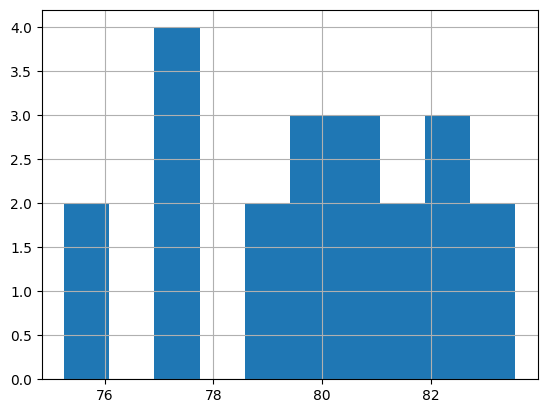

In [ ]:
suppl['Life Expectancy'].hist()  # to visualize the distribution

In [ ]:
suppl['Median Household Income'].describe()  #:)

count        21.000000
mean      85164.428571
std       18509.199112
min       54179.000000
25%       73168.000000
50%       79953.000000
75%      100281.000000
max      117275.000000
Name: Median Household Income, dtype: float64

In [ ]:
correlations = suppl.corr() #aok good
correlations #just play around using a corr matrix

<ipython-input-81-0317fa17801f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = suppl.corr() #aok good


,Life Expectancy,Age-Adjusted Death Rate,% Disconnected Youth,Median Household Income,Suicide Rate (Age-Adjusted),% Severe Housing Cost Burden
Life Expectancy,1.000000,-0.979361,-0.499455,0.755693,-0.523657,-0.157413
Age-Adjusted Death Rate,-0.979361,1.000000,0.598997,-0.840585,0.453989,0.268657
% Disconnected Youth,-0.499455,0.598997,1.000000,-0.713285,-0.110557,0.570254
Median Household Income,0.755693,-0.840585,-0.713285,1.000000,-0.076933,-0.633478
Suicide Rate (Age-Adjusted),-0.523657,0.453989,-0.110557,-0.076933,1.000000,-0.515644
% Severe Housing Cost Burden,-0.157413,0.268657,0.570254,-0.633478,-0.515644,1.000000


In [ ]:
del infood['_merge']

In [ ]:
infoodrank = pd.merge(infood, healthrank, on="County", how="outer", indicator=True)
infoodrank #aok: aha! mistake! bergen didnt match

,County,Imprisonment Rate,%Food Insecurity,2021 Health Ranking,_merge
0,Bergen,50,7.9,4,both
1,Essex,351,12.3,17,both
2,Middlesex,133,8.4,5,both
3,Hudson,143,12.2,9,both
4,Monmouth,131,7.8,6,both
5,Ocean,88,9.8,10,both
6,Union,195,8.3,8,both
7,Passaic,265,12.0,14,both
8,Camden,345,10.9,19,both
9,Morris,40,6.4,1,both


In [ ]:
infood['County']=infood['County'].str.strip()
healthrank['County']=healthrank['County'].str.strip()
infoodrank = pd.merge(infood, healthrank, on="County", how="outer", indicator=True)
infoodrank #now we're cooking with gas!!

,County,Imprisonment Rate,%Food Insecurity,2021 Health Ranking,_merge
0,Bergen,50,7.9,4,both
1,Essex,351,12.3,17,both
2,Middlesex,133,8.4,5,both
3,Hudson,143,12.2,9,both
4,Monmouth,131,7.8,6,both
5,Ocean,88,9.8,10,both
6,Union,195,8.3,8,both
7,Passaic,265,12.0,14,both
8,Camden,345,10.9,19,both
9,Morris,40,6.4,1,both


In [ ]:
del infoodrank['_merge']
withsuppl=pd.merge(infoodrank, suppl, on='County', how='outer', indicator=True)
withsuppl
del withsuppl['_merge']

In [ ]:
withsuppl = withsuppl.rename(columns={'County': 'County of Residence'})
#it should be good...

:( going to merge this dataset with final_merged from ps 2. will change var name from 'County' to "County of Residence" (since ED data is patient aggregates)

In [ ]:
final_merged['County of Residence'] = final_merged['County of Residence'].str.replace(' County', '', regex=False)

NameError: ignored

In [ ]:
final_merged.columns

Index(['Year', 'County of Residence', 'County of Residence ID',
       'Number of ED Visits', 'Total Population Estimates',
       'Crude Rates per 10,000 - ED Visits', '95% CI LL', '95% CI UL',
       'Unemployment Rate', 'Region', 'ED Visit Category',
       'Total Number of Uninsured Persons', '% of Uninsured Persons',
       'Total Homeless Persons ', '% of Total Homeless Persons ',
       'Chronic Homeless Persons ', '% of Chronic Homeless Persons ',
       'Unsheltered Homeless Persons ', '% of Unsheltered Homeless Persons ',
       '_merge'],
      dtype='object')

In [ ]:
final_merged.drop(columns=['_merge', '95% CI LL', '95% CI UL','County of Residence ID'], inplace=True)

<ipython-input-65-d897570d98e2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_merged.drop(columns=['_merge', '95% CI LL', '95% CI UL','County of Residence ID'], inplace=True)


In [ ]:
fullED = final_merged.merge(withsuppl, on='County of Residence', how='outer')
print(fullED)
# note that disconnected youth has a missing value for Warren county

      Year County of Residence  Number of ED Visits  \
0   2021.0            Atlantic             119344.0   
1   2021.0              Bergen             187674.0   
2   2021.0          Burlington             117235.0   
3   2021.0              Camden             207627.0   
4   2021.0            Cape May              31155.0   
5   2021.0          Cumberland              96481.0   
6   2021.0               Essex             303723.0   
7   2021.0          Gloucester              59812.0   
8   2021.0              Hudson             199478.0   
9   2021.0           Hunterdon              24527.0   
10  2021.0              Mercer             134627.0   
11  2021.0           Middlesex             191244.0   
12  2021.0            Monmouth             166553.0   
13  2021.0              Morris              94079.0   
14  2021.0               Ocean             181369.0   
15  2021.0             Passaic             182039.0   
16  2021.0               Salem              17932.0   
17  2021.0

In [ ]:
from scipy.stats import pearsonr
corr_A_B, p_value_A_B = pearsonr(fullED['% Severe Housing Cost Burden'], fullED['Number of ED Visits'])
print(f"Correlation between A and B: {corr_A_B:.3f}")
print(f"P-value for correlation between A and B: {p_value_A_B:.3f}")
#lucy:as the proportion of residents with a severe housing burden increases in a NJ county, there's a tendency for the number of ED visits to also increase
# moderate to strong corr. severe housing burden may be a proxy for financial stress or low SES? could yield potentially interesting insights into care access

Correlation between A and B: 0.694
P-value for correlation between A and B: 0.000


##PS3 refinements & PS4 extensions

lucy: with what i have so far, two goals: 1) do away with raw totals and use rates instead to standardize (especially because most vars were already reported using population denominators), and 2) then explore longtitudinal trends of interesting vars and make some simple pannels.

in particular, i want to explore associations between measures of ED visits and indicator of severe housing burden in the population. so, 1) download and import long data on ED crude rate from the same government data query portal (link in PS2), 2) crude rate per 10,000/100 so it is standardized the same way as "proportion with severe housing burden" is.

In [ ]:
import pandas as pd
longED=pd.read_excel("https://github.com/worldterminator/worldterminator/raw/main/16-21EDlongdata.xlsx")
longED

,Year,County,Number of ED Visits,Population,"Crude Rate per 10,000"
0,2016,Atlantic,129060,267212,4829.9
1,2016,Bergen,219470,928381,2364.0
2,2016,Burlington,145521,447092,3254.8
3,2016,Camden,260483,507119,5136.5
4,2016,Cape May,38270,93825,4078.9
...,...,...,...,...,...
121,2021,Salem,17932,65046,2756.8
122,2021,Somerset,50452,345647,1459.6
123,2021,Sussex,35567,145543,2443.8
124,2021,Union,158743,572114,2774.7


In [ ]:
longED['Crude Rate per 10,000'] = longED['Crude Rate per 10,000']/ 10
longED.rename(columns={'Crude Rate per 10,000': 'ED Visits per 100'}, inplace=True)

In [ ]:
longED = longED[['Year', 'County','ED Visits per 100']]

then i also multiple years of data, in wide format, on proportion with severe housing burden, downloaded and complied from the same source (link in PS3).
note that I kept only the % measure and dropped the number of people with severe burden completely, since a. it's clearly better that both vars are standardized to account for varying population sizes, and b. the raw number of people with severe housing burden for 2022 is not available in the report.

per unit of residents (100), are total ED visits cases associated with the number of individuals facing severe housing burden?

In [ ]:
longED

,Year,ED Visits per 100
0,2016,482.99
1,2016,236.40
2,2016,325.48
3,2016,513.65
4,2016,407.89
...,...,...
121,2021,275.68
122,2021,145.96
123,2021,244.38
124,2021,277.47


In [ ]:
# convert year-county ED Visits per 100 data to a wide format
wideED = longED.pivot_table(index='County', columns='Year', values='ED Visits per 100').reset_index()
print(wideED)

Year      County    2016    2017    2018    2019    2020    2021
0       Atlantic  482.99  452.89  499.53  467.43  355.19  434.03
1         Bergen  236.40  222.50  232.57  234.82  159.42  196.76
2     Burlington  325.48  320.44  313.12  302.92  216.31  252.52
3         Camden  513.65  518.74  495.88  481.41  359.06  396.41
4       Cape May  407.89  404.19  410.45  396.66  291.83  325.68
5     Cumberland  634.24  627.09  571.00  686.57  533.83  628.02
6          Essex  466.44  443.00  422.16  438.70  300.13  355.27
7     Gloucester  307.18  295.30  254.21  248.04  182.44  196.44
8         Hudson  366.52  354.51  374.27  369.87  239.44  283.97
9      Hunterdon  210.75  193.29  180.95  194.80  149.44  188.78
10        Mercer  464.07  462.91  453.83  473.40  330.88  348.87
11     Middlesex  282.25  277.21  269.16  266.54  181.06  222.17
12      Monmouth  332.64  320.57  320.06  306.83  202.13  258.08
13        Morris  223.04  218.93  216.37  224.97  153.03  184.11
14         Ocean  359.07 

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:512: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


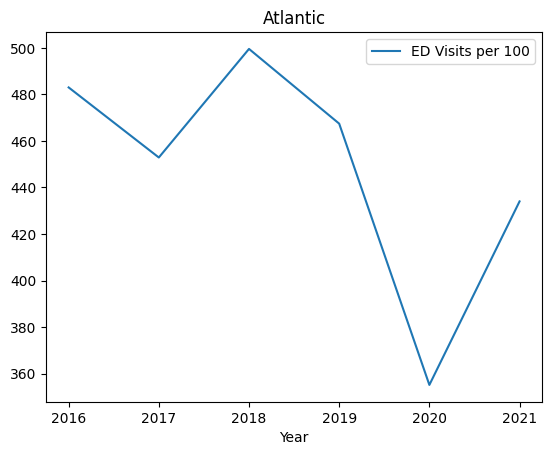

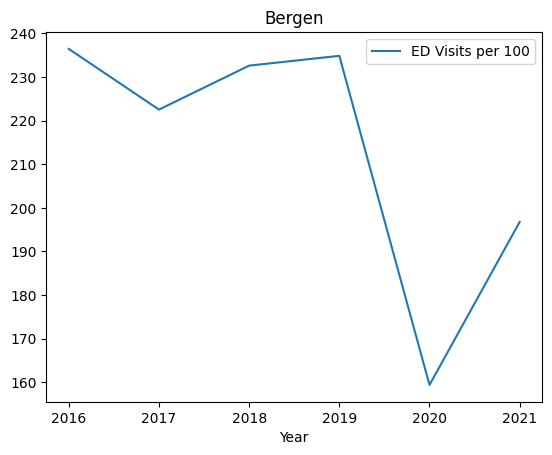

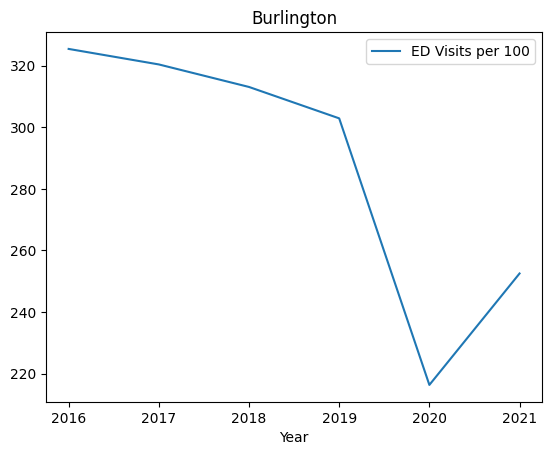

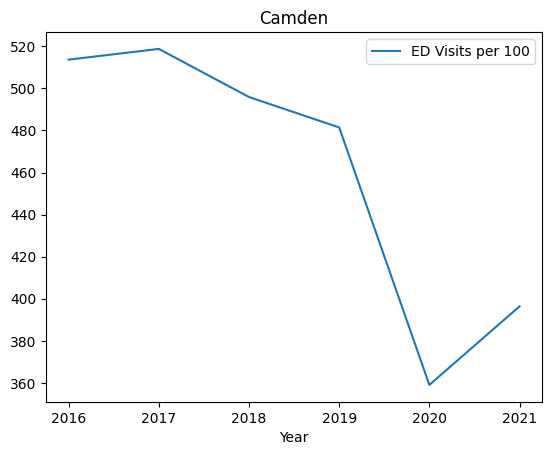

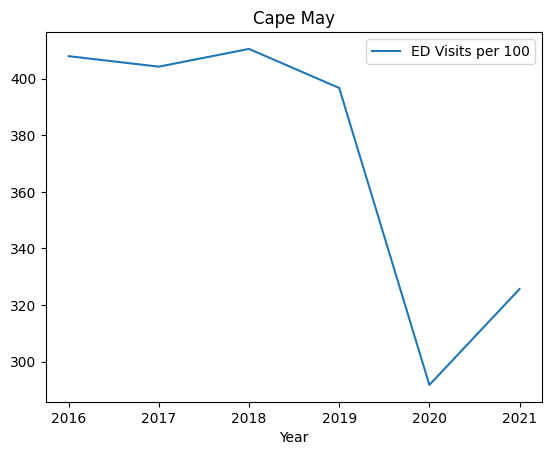

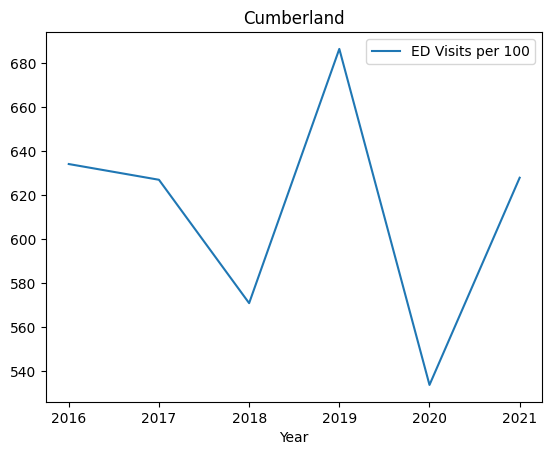

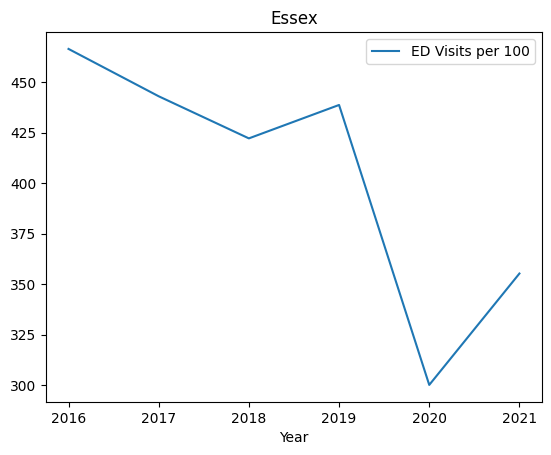

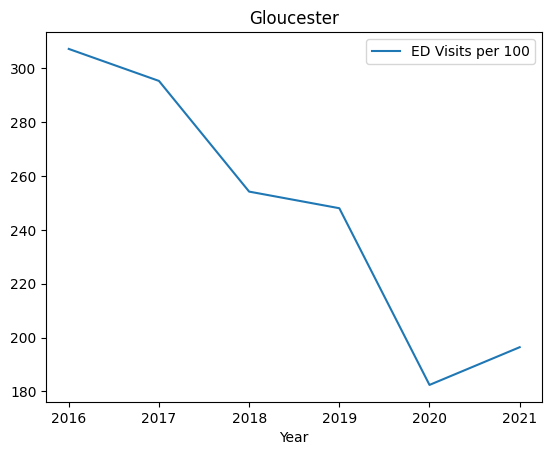

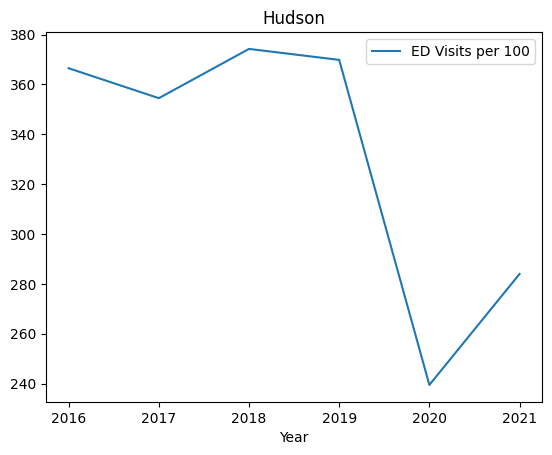

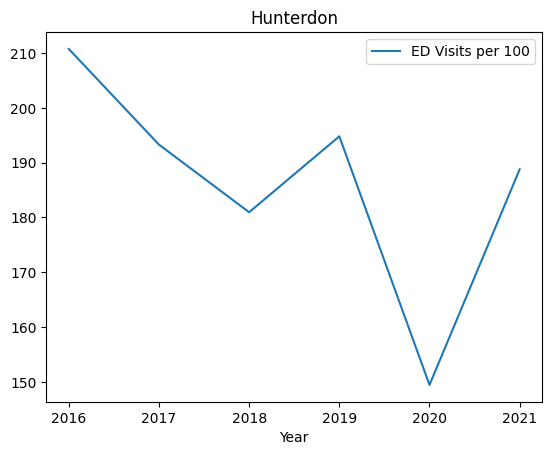

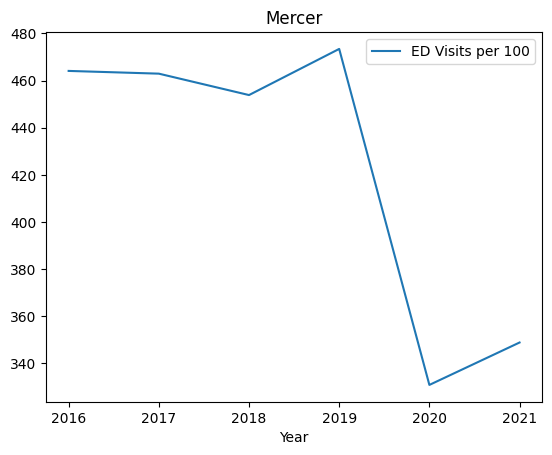

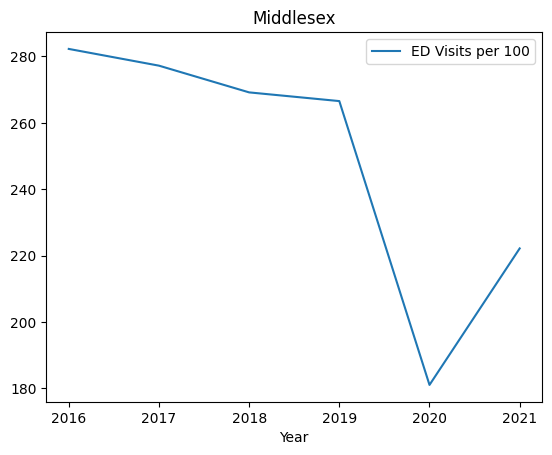

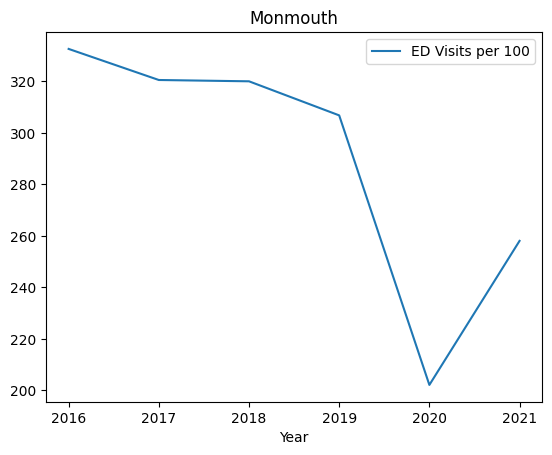

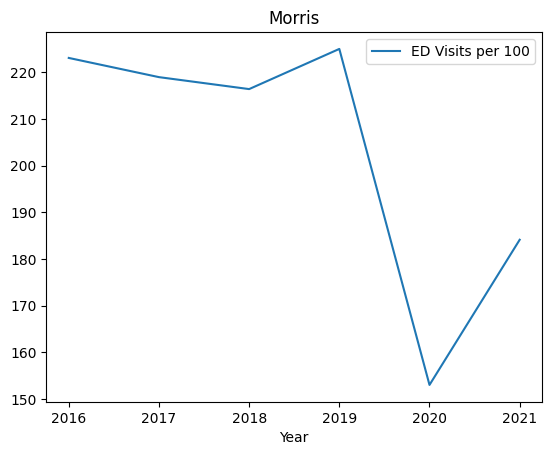

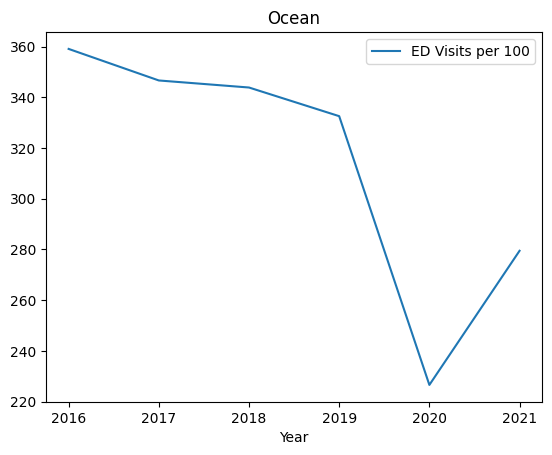

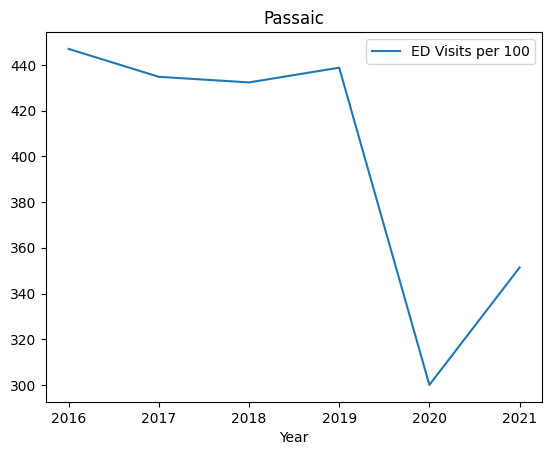

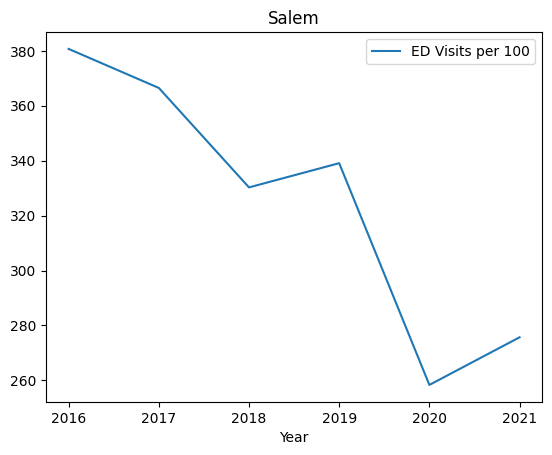

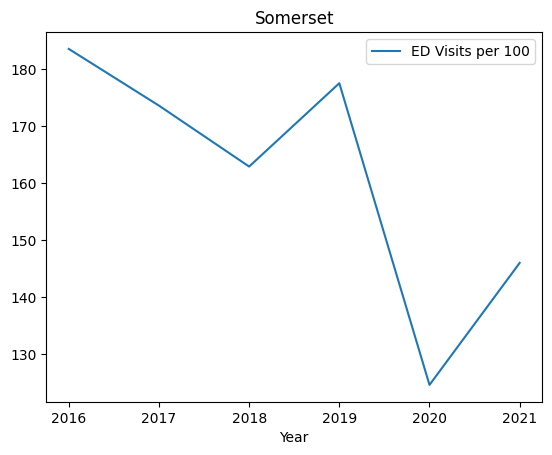

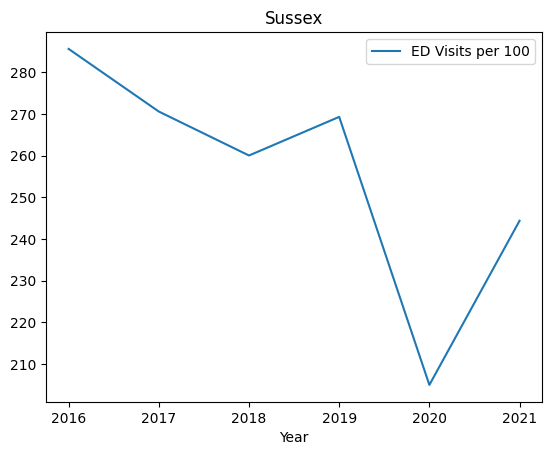

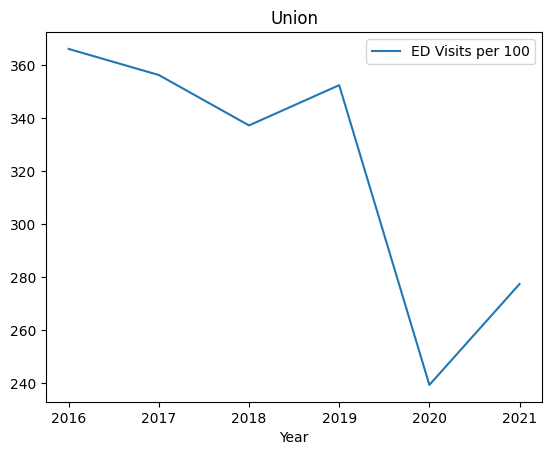

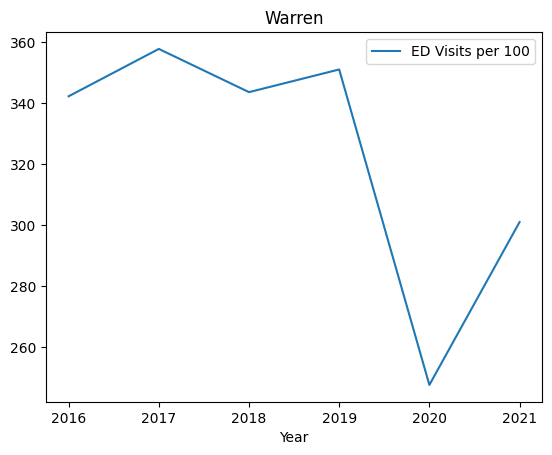

In [ ]:
import matplotlib.pyplot as plt
counties = longED['County'].unique()
for county in counties:
    subset = longED[longED['County'] == county]
    subset.plot(x='Year', y='ED Visits per 100', title=county)

plt.show()
#here I want to graph a trend for each county. so subset values for each county and plot them~

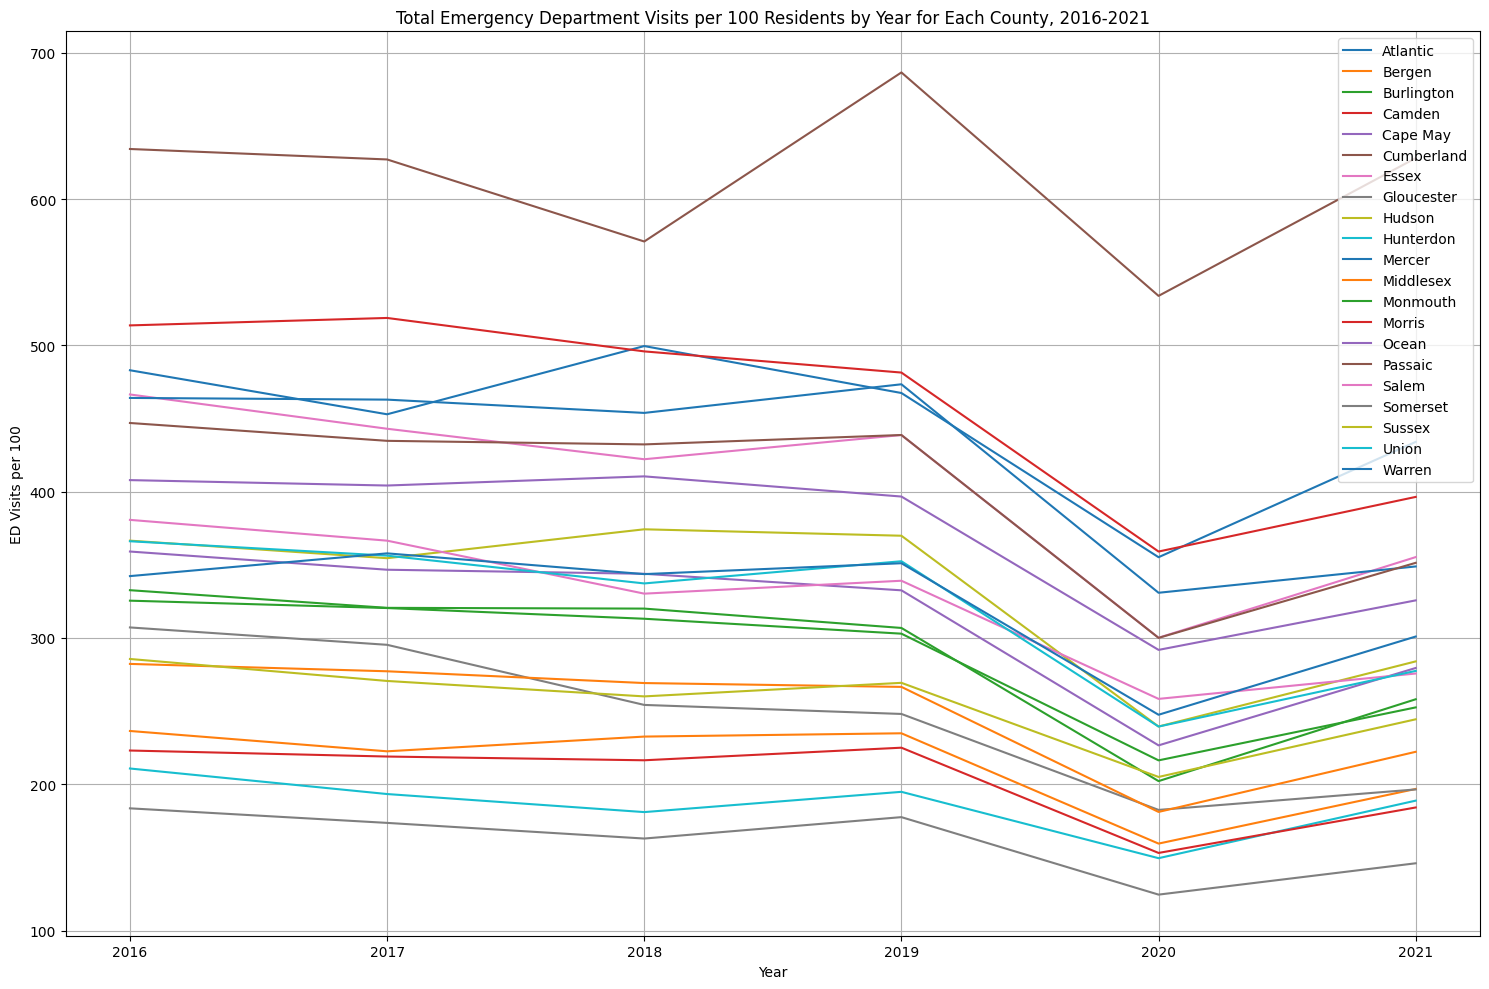

In [ ]:
# most counties had a peak in 2019:( and a big drop in 2020:), and then a rebounce in 2021
# intepret with regard to early vs. later pandemic practices and policies? would be interesting if we have monthly data

# to compare trends, i plotted them again into one graph
counties = longED['County'].unique()
plt.figure(figsize=(15, 10))  # Adjust the size of the figure as needed

for county in counties:
    subset = longED[longED['County'] == county]
    plt.plot(subset['Year'], subset['ED Visits per 100'], label=county)

plt.title('Total Emergency Department Visits per 100 Residents by Year for Each County, 2016-2021')
plt.xlabel('Year')
plt.ylabel('ED Visits per 100')
plt.legend()  # Display a legend to differentiate the counties
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
widehousing=pd.read_excel("https://github.com/worldterminator/worldterminator/raw/main/19-21housing.xlsx")
widehousing

,County,2019 %Severe Housing Cost Burden,2020 %Severe Housing Cost Burden,2021 %Severe Housing Cost Burden,2022 %Severe Housing Cost Burden
0,Atlantic,22.651037,21.206188,19.982839,20.307692
1,Bergen,19.959523,19.535095,18.584412,18.627113
2,Burlington,14.448726,14.280635,13.498833,13.685522
3,Camden,18.689006,18.308578,17.577162,17.632164
4,Cape May,19.537128,19.370698,18.500990,18.285281
5,Cumberland,21.323960,20.844871,20.788241,19.950100
6,Essex,25.271614,25.126403,24.710859,24.114164
7,Gloucester,14.659158,14.153446,13.825050,13.692782
8,Hudson,22.738068,22.015803,20.696751,21.233834
9,Hunterdon,13.496707,13.553594,12.182642,13.124534


#PS 2 begins here

In [ ]:
#Hi AOK! below is the work by *lucy/Yachun* and ~Citlalli~
#Our data sources:
#The Uninsured data comes from the Census Bureau and shows estimated numbers of uninsured persons for each county.
#The Homeless data was acquired from the Monarch Housing Associates Funding provided by NJHMFA. It shows the population of homeless persons by county.
#Unemployment data was obtained from the Local Area Unemployment Statistics (Bureau of Labor Statistics), the  unemployment data was broken down by county.
#Emergency Department visits were acquired from the Centers for Disease Control and Prevention and shows the number of visits to the Emergency department by county of residence.
#All the data files were uploaded to Github (worldterminator's repository)already; most of them were obtained from data queries online or after filters were applied.

#aok: ok but also give urls to source data

In [ ]:
#The data set created by merging the 4 data sets could be of interest to later explore associations among variables recorded in our merged dataset.
#The resulting collection of variables would allow us to answer an interesting and cohorent research question
#such as how insured vs. uninsured status, homeless status, unemployment status and ED visit patterns may be related together
#and for us to derive practical implications for future policy-making and intervention programs.

#aok: good!

##unemployment

In [ ]:
import pandas as pd
# Reading the CSV while skipping the first two rows
test1 = pd.read_csv('https://raw.githubusercontent.com/worldterminator/worldterminator/main/UnemploymentReport%20-%20UnemploymentReport%20(1).csv', skiprows=2)
unemployment = test1.drop(columns=['Unnamed: 0', 'Unnamed: 13'])


In [ ]:
unemployment.head() #this resulting df is the unemployment df :)

,FIPS,Name,2014,2015,2016,2017,2018,2019,2020,2021,2022,Median Household Income (2021),% of State Median HH Income
0,34000,New Jersey,6.7,5.7,4.9,4.5,4.0,3.5,9.4,6.6,3.7,"$89,227",100.0%
1,34001,"Atlantic County, NJ",10.5,9.5,7.4,7.1,5.7,4.9,17.1,9.8,5.1,"$65,693",73.6%
2,34003,"Bergen County, NJ",5.4,4.6,4.1,3.8,3.3,2.8,9.2,6.3,3.4,"$104,777",117.4%
3,34005,"Burlington County, NJ",6.4,5.3,4.4,4.0,3.6,3.2,7.9,5.6,3.3,"$94,043",105.4%
4,34007,"Camden County, NJ",7.7,6.4,5.5,5.0,4.5,3.9,9.7,7.0,4.0,"$77,675",87.1%


##ED (primary outcome var)

In [ ]:
ED=pd.read_excel('https://github.com/worldterminator/worldterminator/raw/main/ED.xlsx')
ED.head()
# this is emergency department data from 2021 by county retreived from New Jersey State Health Assessment Data
# original table (after filters were applied) is available on https://www-doh.state.nj.us/doh-shad/query/result/ub/UB10AllEDCo/CrudeRate.html
# https://www-doh.state.nj.us/doh-shad/query/builder/ub/UB10AllEDCo/CrudeRate.html

,Year,County of Residence,County of Residence ID,Number of ED Visits,Number in the Population,"Crude Rates per 10,000 - ED Visits",95% CI LL,95% CI UL
0,2021,Atlantic,1,119344,274966,4340.3,4321.8,4358.8
1,2021,Bergen,2,187674,953819,1967.6,1959.6,1975.6
2,2021,Burlington,3,117235,464269,2525.2,2512.7,2537.6
3,2021,Camden,4,207627,523771,3964.1,3950.8,3977.3
4,2021,Cape May,5,31155,95661,3256.8,3227.1,3286.5


In [ ]:
#replacement on condition to add ' County' after each county name. Did this again with the fourth dataset
ED['County of Residence']= ED['County of Residence'].apply(lambda x: x+ ' County' if 'County' not in x else x) #aok: neat
ED #actually without print() its prettier

,Year,County of Residence,County of Residence ID,Number of ED Visits,Number in the Population,"Crude Rates per 10,000 - ED Visits",95% CI LL,95% CI UL
0,2021,Atlantic County,1,119344,274966,4340.3,4321.8,4358.8
1,2021,Bergen County,2,187674,953819,1967.6,1959.6,1975.6
2,2021,Burlington County,3,117235,464269,2525.2,2512.7,2537.6
3,2021,Camden County,4,207627,523771,3964.1,3950.8,3977.3
4,2021,Cape May County,5,31155,95661,3256.8,3227.1,3286.5
5,2021,Cumberland County,6,96481,153627,6280.2,6256.0,6304.4
6,2021,Essex County,7,303723,854917,3552.7,3542.5,3562.8
7,2021,Gloucester County,8,59812,304477,1964.4,1950.3,1978.5
8,2021,Hudson County,9,199478,702463,2839.7,2829.2,2850.2
9,2021,Hunterdon County,10,24527,129924,1887.8,1866.5,1909.1


In [ ]:
!ls

sample_data


In [ ]:
# use 'unemployment' (all lowercase)#just realized this!!
Unemployment2021 = unemployment[['Name', '2021']]
Unemployment2021 = Unemployment2021.rename(columns={'Name': 'County of Residence'})
Unemployment2021.head()


,County of Residence,2021
0,New Jersey,6.6
1,"Atlantic County, NJ",9.8
2,"Bergen County, NJ",6.3
3,"Burlington County, NJ",5.6
4,"Camden County, NJ",7.0


In [ ]:
Unemployment2021['County of Residence'] = Unemployment2021['County of Residence'].str.replace(', NJ', '')
#recode observations—drop ", NJ"
Unemployment2021 = Unemployment2021.rename(columns={'2021': 'Unemployment Rate'})
Unemployment2021.head()

,County of Residence,Unemployment Rate
0,New Jersey,6.6
1,Atlantic County,9.8
2,Bergen County,6.3
3,Burlington County,5.6
4,Camden County,7.0


In [ ]:
print(dir())


['ED', 'In', 'Out', 'Unemployment2021', '_', '_2', '_4', '_5', '_6', '_8', '_9', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__package__', '__spec__', '_dh', '_exit_code', '_i', '_i1', '_i10', '_i2', '_i3', '_i4', '_i5', '_i6', '_i7', '_i8', '_i9', '_ih', '_ii', '_iii', '_oh', 'exit', 'get_ipython', 'pd', 'quit', 'test1', 'unemployment']


In [ ]:
ED.shape

(22, 8)

In [ ]:
Unemployment2021.shape

(22, 2)

In [ ]:
#aok: no! first merge always 'outer' always have indicator=True and always investigate

Unemployment2021['County of Residence'] = Unemployment2021['County of Residence'].str.strip()
# Left merge 'Unemployment2021' into 'ED' based on 'County of Residence'

merged2021 = pd.merge(ED, Unemployment2021, on='County of Residence', how='outer',indicator=True)
merged2021 #aok: ok so we see 1 left_only and 1 right_only make sense so ok to proceed with 'left' or 'inner'--BUT had to check first!!!
#merged2021 = pd.merge(ED, Unemployment2021, on='County of Residence', how='left')

#merged2021= merged2021[['Year', 'Unemployment Rate','County of Residence','Number of ED Visits','Number in the Population','Crude Rates per 10,000 - ED Visits']]
#merged2021

#hope this run on your end as well, Cit!
#now this looks clean and ready to go



,Year,County of Residence,County of Residence ID,Number of ED Visits,Number in the Population,"Crude Rates per 10,000 - ED Visits",95% CI LL,95% CI UL,Unemployment Rate,_merge
0,2021.0,Atlantic County,1.0,119344.0,274966,4340.3,4321.8,4358.8,9.8,both
1,2021.0,Bergen County,2.0,187674.0,953819,1967.6,1959.6,1975.6,6.3,both
2,2021.0,Burlington County,3.0,117235.0,464269,2525.2,2512.7,2537.6,5.6,both
3,2021.0,Camden County,4.0,207627.0,523771,3964.1,3950.8,3977.3,7.0,both
4,2021.0,Cape May County,5.0,31155.0,95661,3256.8,3227.1,3286.5,9.2,both
5,2021.0,Cumberland County,6.0,96481.0,153627,6280.2,6256.0,6304.4,8.0,both
6,2021.0,Essex County,7.0,303723.0,854917,3552.7,3542.5,3562.8,8.3,both
7,2021.0,Gloucester County,8.0,59812.0,304477,1964.4,1950.3,1978.5,6.3,both
8,2021.0,Hudson County,9.0,199478.0,702463,2839.7,2829.2,2850.2,7.0,both
9,2021.0,Hunterdon County,10.0,24527.0,129924,1887.8,1866.5,1909.1,4.8,both


## NJ regions

In [ ]:
import numpy as np
# define the regions  NJ counties are divided into...
#while I was thinking about just northern vs southern, I tried 3 levels here
northern_counties = ['Bergen County', 'Essex County', 'Hudson County', 'Morris County', 'Passaic County', 'Sussex County', 'Union County', 'Warren County']  # Add other northern counties as needed
southern_counties = ['Atlantic County', 'Camden County', 'Cape May County', 'Cumberland County', 'Gloucester County', 'Salem County','Burlington County']  # Add other southern counties as needed
central_counties = ['Hunterdon County', 'Mercer County', 'Somerset County', 'Middlesex County','Monmouth County','Ocean County']  # Add other central counties as needed

# Create a new column 'Region' based on the county using list comprehension.
merged2021['Region'] = ['Northern' if county in northern_counties else
                        ('Southern' if county in southern_counties else
                         ('Central' if county in central_counties else np.nan))
                        for county in merged2021['County of Residence']]

# so assigned NA value to the last row for unknown
merged2021



,Year,County of Residence,County of Residence ID,Number of ED Visits,Number in the Population,"Crude Rates per 10,000 - ED Visits",95% CI LL,95% CI UL,Unemployment Rate,_merge,Region
0,2021.0,Atlantic County,1.0,119344.0,274966,4340.3,4321.8,4358.8,9.8,both,Southern
1,2021.0,Bergen County,2.0,187674.0,953819,1967.6,1959.6,1975.6,6.3,both,Northern
2,2021.0,Burlington County,3.0,117235.0,464269,2525.2,2512.7,2537.6,5.6,both,Southern
3,2021.0,Camden County,4.0,207627.0,523771,3964.1,3950.8,3977.3,7.0,both,Southern
4,2021.0,Cape May County,5.0,31155.0,95661,3256.8,3227.1,3286.5,9.2,both,Southern
5,2021.0,Cumberland County,6.0,96481.0,153627,6280.2,6256.0,6304.4,8.0,both,Southern
6,2021.0,Essex County,7.0,303723.0,854917,3552.7,3542.5,3562.8,8.3,both,Northern
7,2021.0,Gloucester County,8.0,59812.0,304477,1964.4,1950.3,1978.5,6.3,both,Southern
8,2021.0,Hudson County,9.0,199478.0,702463,2839.7,2829.2,2850.2,7.0,both,Northern
9,2021.0,Hunterdon County,10.0,24527.0,129924,1887.8,1866.5,1909.1,4.8,both,Central


In [ ]:
#aggregate ED visits by region
aggregated_data = merged2021.groupby('Region')['Number of ED Visits'].sum().reset_index()

# Print aggregated DataFrame
aggregated_data

,Region,Number of ED Visits
0,Central,748772.0
1,Northern,1194628.0
2,Southern,649586.0


In [ ]:
high_visits_condition = (merged2021['Number of ED Visits'] > 150000)
medium_visits_condition = ((merged2021['Number of ED Visits'] <= 150000) & (merged2021['Number of ED Visits'] > 100000))
low_visits_condition = (merged2021['Number of ED Visits'] <= 100000)

# Use .loc[] to assign the new values~
merged2021.loc[high_visits_condition, 'ED Visit Category'] = 'High'
merged2021.loc[medium_visits_condition, 'ED Visit Category'] = 'Medium'
merged2021.loc[low_visits_condition, 'ED Visit Category'] = 'Low'

# Print the result
merged2021

#aok: but think about meaning! wouldnt be more meaningful per capita?


,Year,County of Residence,County of Residence ID,Number of ED Visits,Number in the Population,"Crude Rates per 10,000 - ED Visits",95% CI LL,95% CI UL,Unemployment Rate,_merge,Region,ED Visit Category
0,2021.0,Atlantic County,1.0,119344.0,274966,4340.3,4321.8,4358.8,9.8,both,Southern,Medium
1,2021.0,Bergen County,2.0,187674.0,953819,1967.6,1959.6,1975.6,6.3,both,Northern,High
2,2021.0,Burlington County,3.0,117235.0,464269,2525.2,2512.7,2537.6,5.6,both,Southern,Medium
3,2021.0,Camden County,4.0,207627.0,523771,3964.1,3950.8,3977.3,7.0,both,Southern,High
4,2021.0,Cape May County,5.0,31155.0,95661,3256.8,3227.1,3286.5,9.2,both,Southern,Low
5,2021.0,Cumberland County,6.0,96481.0,153627,6280.2,6256.0,6304.4,8.0,both,Southern,Low
6,2021.0,Essex County,7.0,303723.0,854917,3552.7,3542.5,3562.8,8.3,both,Northern,High
7,2021.0,Gloucester County,8.0,59812.0,304477,1964.4,1950.3,1978.5,6.3,both,Southern,Low
8,2021.0,Hudson County,9.0,199478.0,702463,2839.7,2829.2,2850.2,7.0,both,Northern,High
9,2021.0,Hunterdon County,10.0,24527.0,129924,1887.8,1866.5,1909.1,4.8,both,Central,Low


##uninsurance

In [ ]:
uninsured=pd.read_csv('https://github.com/worldterminator/worldterminator/raw/main/uninsurance.csv',header=1)
uninsured.head()
#data for 2021 captured from NJSHAD Health Indicator report on healthcare coverage

,Year,ID,Name,Number,MOE,%,%MOE,Number.1,MOE.1
0,2021,34000,New Jersey,556948,16751,10.0,0.3,5554302,0
1,2021,34001,"Atlantic County, NJ",19421,1936,12.0,1.2,161208,0
2,2021,34003,"Bergen County, NJ",50552,3921,8.8,0.7,577312,0
3,2021,34005,"Burlington County, NJ",17456,1758,6.3,0.6,277546,0
4,2021,34007,"Camden County, NJ",28487,2589,9.0,0.8,315907,0


In [ ]:
#recode observations—drop ', NJ', again
uninsured['Name'] = uninsured['Name'].str.replace(', NJ', '')

In [ ]:
uninsured = uninsured.drop(uninsured.index[0])
uninsured

,Year,ID,Name,Number,MOE,%,%MOE,Number.1,MOE.1
1,2021,34001,Atlantic County,19421,1936,12.0,1.2,161208,0
2,2021,34003,Bergen County,50552,3921,8.8,0.7,577312,0
3,2021,34005,Burlington County,17456,1758,6.3,0.6,277546,0
4,2021,34007,Camden County,28487,2589,9.0,0.8,315907,0
5,2021,34009,Cape May County,4507,551,8.8,1.1,51105,0
6,2021,34011,Cumberland County,11816,1246,14.0,1.5,84590,0
7,2021,34013,Essex County,74856,5152,14.6,1.0,511982,0
8,2021,34015,Gloucester County,12229,1386,6.6,0.7,185768,0
9,2021,34017,Hudson County,63226,4576,13.6,1.0,463883,0
10,2021,34019,Hunterdon County,4018,489,5.2,0.6,76702,0


In [ ]:
uninsured.columns #the column names are later changed in the merged dataframe!!

Index(['Year', 'ID', 'Name', 'Number', 'MOE', '%', '%MOE', 'Number.1',
       'MOE.1'],
      dtype='object')

In [ ]:
merged2021.drop(['_merge'], axis=1,inplace=True)


In [ ]:
# !Remove 'Year' and 'ID' columns
uninsured = uninsured.drop(columns=['Year', 'ID'])

# Rename 'Name' column to 'County of Residence'
uninsured = uninsured.rename(columns={'Name': 'County of Residence'})

# Merge uninsured with merged_2021 DataFrame based on 'County of Residence'
new_merged = pd.merge(merged2021, uninsured, how='outer', left_on='County of Residence', right_on='County of Residence',indicator=True) #aok again same thing
new_merged
# If you want the final DataFrame to have a clean set of column names, you can drop the redundant column(s)



,Year,County of Residence,County of Residence ID,Number of ED Visits,Number in the Population,"Crude Rates per 10,000 - ED Visits",95% CI LL,95% CI UL,Unemployment Rate,Region,ED Visit Category,Number,MOE,%,%MOE,Number.1,MOE.1,_merge
0,2021.0,Atlantic County,1.0,119344.0,274966,4340.3,4321.8,4358.8,9.8,Southern,Medium,19421.0,1936.0,12.0,1.2,161208.0,0.0,both
1,2021.0,Bergen County,2.0,187674.0,953819,1967.6,1959.6,1975.6,6.3,Northern,High,50552.0,3921.0,8.8,0.7,577312.0,0.0,both
2,2021.0,Burlington County,3.0,117235.0,464269,2525.2,2512.7,2537.6,5.6,Southern,Medium,17456.0,1758.0,6.3,0.6,277546.0,0.0,both
3,2021.0,Camden County,4.0,207627.0,523771,3964.1,3950.8,3977.3,7.0,Southern,High,28487.0,2589.0,9.0,0.8,315907.0,0.0,both
4,2021.0,Cape May County,5.0,31155.0,95661,3256.8,3227.1,3286.5,9.2,Southern,Low,4507.0,551.0,8.8,1.1,51105.0,0.0,both
5,2021.0,Cumberland County,6.0,96481.0,153627,6280.2,6256.0,6304.4,8.0,Southern,Low,11816.0,1246.0,14.0,1.5,84590.0,0.0,both
6,2021.0,Essex County,7.0,303723.0,854917,3552.7,3542.5,3562.8,8.3,Northern,High,74856.0,5152.0,14.6,1.0,511982.0,0.0,both
7,2021.0,Gloucester County,8.0,59812.0,304477,1964.4,1950.3,1978.5,6.3,Southern,Low,12229.0,1386.0,6.6,0.7,185768.0,0.0,both
8,2021.0,Hudson County,9.0,199478.0,702463,2839.7,2829.2,2850.2,7.0,Northern,High,63226.0,4576.0,13.6,1.0,463883.0,0.0,both
9,2021.0,Hunterdon County,10.0,24527.0,129924,1887.8,1866.5,1909.1,4.8,Central,Low,4018.0,489.0,5.2,0.6,76702.0,0.0,both


In [ ]:
new_merged.head()

,Year,County of Residence,County of Residence ID,Number of ED Visits,Number in the Population,"Crude Rates per 10,000 - ED Visits",95% CI LL,95% CI UL,Unemployment Rate,Region,ED Visit Category,Number,MOE,%,%MOE,Number.1,MOE.1,_merge
0,2021.0,Atlantic County,1.0,119344.0,274966,4340.3,4321.8,4358.8,9.8,Southern,Medium,19421.0,1936.0,12.0,1.2,161208.0,0.0,both
1,2021.0,Bergen County,2.0,187674.0,953819,1967.6,1959.6,1975.6,6.3,Northern,High,50552.0,3921.0,8.8,0.7,577312.0,0.0,both
2,2021.0,Burlington County,3.0,117235.0,464269,2525.2,2512.7,2537.6,5.6,Southern,Medium,17456.0,1758.0,6.3,0.6,277546.0,0.0,both
3,2021.0,Camden County,4.0,207627.0,523771,3964.1,3950.8,3977.3,7.0,Southern,High,28487.0,2589.0,9.0,0.8,315907.0,0.0,both
4,2021.0,Cape May County,5.0,31155.0,95661,3256.8,3227.1,3286.5,9.2,Southern,Low,4507.0,551.0,8.8,1.1,51105.0,0.0,both


In [ ]:
new_merged.drop(['_merge'], axis=1,inplace=True)


##homeless

In [ ]:
homeless=pd.read_excel('https://github.com/worldterminator/worldterminator/raw/main/homeless.xlsx')
homeless
#data captured from 2021 NJ PIT report (pdf)

,County,Total Homeless Persons,% of Total Homeless Persons,Chronic Homeless Persons,% of Chronic Homeless Persons,Unsheltered Homeless Persons,% of Unsheltered Homeless Persons
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Atlantic,326.0,0.04,112.0,0.08,122.0,0.15
2,Bergen,279.0,0.03,4.0,0.00,5.0,0.01
3,Burlington,604.0,0.07,117.0,0.08,8.0,0.01
4,Camden,650.0,0.08,199.0,0.13,77.0,0.09
5,Cape May,113.0,0.01,12.0,0.01,10.0,0.01
6,Cumberland,82.0,0.01,18.0,0.01,19.0,0.02
7,Essex,1693.0,0.21,172.0,0.12,94.0,0.11
8,Gloucester,93.0,0.01,10.0,0.01,3.0,0.00
9,Hudson,882.0,0.11,205.0,0.14,156.0,0.19


In [ ]:
homeless=homeless.dropna(how='all')
homeless.head()

,County,Total Homeless Persons,% of Total Homeless Persons,Chronic Homeless Persons,% of Chronic Homeless Persons,Unsheltered Homeless Persons,% of Unsheltered Homeless Persons
1,Atlantic,326.0,0.04,112.0,0.08,122.0,0.15
2,Bergen,279.0,0.03,4.0,0.00,5.0,0.01
3,Burlington,604.0,0.07,117.0,0.08,8.0,0.01
4,Camden,650.0,0.08,199.0,0.13,77.0,0.09
5,Cape May,113.0,0.01,12.0,0.01,10.0,0.01


In [ ]:
homeless= homeless.rename(columns={'County ': 'County of Residence'})

In [ ]:
homeless['County of Residence']= homeless['County of Residence'].apply(lambda x: x+ ' County' if 'County' not in x else x)
print(homeless)

   County of Residence  Total Homeless Persons   % of Total Homeless Persons   \
1      Atlantic County                    326.0                          0.04   
2        Bergen County                    279.0                          0.03   
3    Burlington County                    604.0                          0.07   
4        Camden County                    650.0                          0.08   
5      Cape May County                    113.0                          0.01   
6    Cumberland County                     82.0                          0.01   
7         Essex County                   1693.0                          0.21   
8    Gloucester County                     93.0                          0.01   
9        Hudson County                    882.0                          0.11   
10    Hunterdon County                    103.0                          0.01   
11       Mercer County                    393.0                          0.05   
12    Middlesex County      

In [ ]:
homeless.columns

Index(['County of Residence', 'Total Homeless Persons ',
       '% of Total Homeless Persons ', 'Chronic Homeless Persons ',
       '% of Chronic Homeless Persons ', 'Unsheltered Homeless Persons ',
       '% of Unsheltered Homeless Persons '],
      dtype='object')

In [ ]:
homeless.head()

,County of Residence,Total Homeless Persons,% of Total Homeless Persons,Chronic Homeless Persons,% of Chronic Homeless Persons,Unsheltered Homeless Persons,% of Unsheltered Homeless Persons
1,Atlantic County,326.0,0.04,112.0,0.08,122.0,0.15
2,Bergen County,279.0,0.03,4.0,0.00,5.0,0.01
3,Burlington County,604.0,0.07,117.0,0.08,8.0,0.01
4,Camden County,650.0,0.08,199.0,0.13,77.0,0.09
5,Cape May County,113.0,0.01,12.0,0.01,10.0,0.01


In [ ]:
final_merged = pd.merge(new_merged, homeless, how='outer', left_on='County of Residence', right_on='County of Residence',indicator=True)

In [ ]:
final_merged[['County of Residence','_merge']] ##yay!!lucy dancing #aok: before dancing again check the merge

,County of Residence,_merge
0,Atlantic County,both
1,Bergen County,both
2,Burlington County,both
3,Camden County,both
4,Cape May County,both
5,Cumberland County,both
6,Essex County,both
7,Gloucester County,both
8,Hudson County,both
9,Hunterdon County,both


In [ ]:
#there are a few columns (number, MOE, etc.) that need to be renamed or dropped:
final_merged.rename(columns={'Number': 'Total Number of Uninsured Persons'}, inplace=True)
final_merged.rename(columns={'%': '% of Uninsured Persons'}, inplace=True)
# Drop '%MOE' column
final_merged.drop(columns=['%MOE','MOE.1','Number.1','MOE'], inplace=True)

# Print modified DataFrame
final_merged.head

<bound method NDFrame.head of       Year       County of Residence  County of Residence ID  \
0   2021.0           Atlantic County                     1.0   
1   2021.0             Bergen County                     2.0   
2   2021.0         Burlington County                     3.0   
3   2021.0             Camden County                     4.0   
4   2021.0           Cape May County                     5.0   
5   2021.0         Cumberland County                     6.0   
6   2021.0              Essex County                     7.0   
7   2021.0         Gloucester County                     8.0   
8   2021.0             Hudson County                     9.0   
9   2021.0          Hunterdon County                    10.0   
10  2021.0             Mercer County                    11.0   
11  2021.0          Middlesex County                    12.0   
12  2021.0           Monmouth County                    13.0   
13  2021.0             Morris County                    14.0   
14  2021.0

In [ ]:
final_merged.rename(columns={'Number in the Population': 'Total Population Estimates'}, inplace=True)

In [ ]:
final_merged.columns

Index(['Year', 'County of Residence', 'County of Residence ID',
       'Number of ED Visits', 'Total Population Estimates',
       'Crude Rates per 10,000 - ED Visits', '95% CI LL', '95% CI UL',
       'Unemployment Rate', 'Region', 'ED Visit Category',
       'Total Number of Uninsured Persons', '% of Uninsured Persons',
       'Total Homeless Persons ', '% of Total Homeless Persons ',
       'Chronic Homeless Persons ', '% of Chronic Homeless Persons ',
       'Unsheltered Homeless Persons ', '% of Unsheltered Homeless Persons ',
       '_merge'],
      dtype='object')

In [ ]:
final_merged = final_merged.iloc[:-2]
print(final_merged)
#it's true that there are 2 rows carelessly left there (unknown residence and NJ totals). remove them by positional idexers

      Year County of Residence  County of Residence ID  Number of ED Visits  \
0   2021.0     Atlantic County                     1.0             119344.0   
1   2021.0       Bergen County                     2.0             187674.0   
2   2021.0   Burlington County                     3.0             117235.0   
3   2021.0       Camden County                     4.0             207627.0   
4   2021.0     Cape May County                     5.0              31155.0   
5   2021.0   Cumberland County                     6.0              96481.0   
6   2021.0        Essex County                     7.0             303723.0   
7   2021.0   Gloucester County                     8.0              59812.0   
8   2021.0       Hudson County                     9.0             199478.0   
9   2021.0    Hunterdon County                    10.0              24527.0   
10  2021.0       Mercer County                    11.0             134627.0   
11  2021.0    Middlesex County                    12

In [ ]:
aggregated_data2 = final_merged.groupby('Region')['Total Homeless Persons '].sum().reset_index()
print(aggregated_data2)
#aggregate total homeless persons by region

#aok: ok but have that option i have in my setup that prints everything not just the last command; default is last command only

     Region  Total Homeless Persons 
0   Central                   2039.0
1  Northern                   4156.0
2  Southern                   1902.0


In [ ]:
aggregated_data3 = final_merged.groupby('Region')['Total Number of Uninsured Persons'].sum().reset_index()
print(aggregated_data3) #aggregate total uninsured persons by region

     Region  Total Number of Uninsured Persons
0   Central                           142156.0
1  Northern                           317834.0
2  Southern                            96958.0


In [ ]:
# Subset for first 5 rows and 2 selected columns
subset_df = final_merged.loc[:4, ['Crude Rates per 10,000 - ED Visits', '% of Uninsured Persons']]
print(subset_df)
# some preliminary signs of a positive correlational trend? worth investigating in future analyses aok: ok good, do a scatterplot:
# https://colab.research.google.com/github/theaok/vis/blob/main/plotly.ipynb

  Crude Rates per 10,000 - ED Visits  % of Uninsured Persons
0                             4340.3                    12.0
1                             1967.6                     8.8
2                             2525.2                     6.3
3                             3964.1                     9.0
4                             3256.8                     8.8


In [ ]:
subset_df2 = final_merged.loc[:10, ['Total Homeless Persons ', 'Number of ED Visits']]
print(subset_df2)
# total homeless persons vs number of ED visits in a county. the trend is less clear from jus these few observations
#but it appears that there are extreme cases, beside which there still could be a relationship...:(

    Total Homeless Persons   Number of ED Visits
0                     326.0             119344.0
1                     279.0             187674.0
2                     604.0             117235.0
3                     650.0             207627.0
4                     113.0              31155.0
5                      82.0              96481.0
6                    1693.0             303723.0
7                      93.0              59812.0
8                     882.0             199478.0
9                     103.0              24527.0
10                    393.0             134627.0


(ps2 stuff ends here.)

In [ ]:
#str. replace ("$"," ") convert some characters (?)
#always use dtypes to see the types of variables
#could use pandas to load excels (AOK-proved)

#df.(variable name)=df['column name'].astype(float) #create a new variable for the values so it floats
#the purpose of the float function is to convert real numbers or integers into floating point numbers
#the query function
#.isnull #deal with missing data #().replace(np.nan, "None")
#inplace='True' inmportant when the replacement is meant to be saved
#(df).(v)=(df).(v).replace(['domestic','foreign'], ['0','1'])
#conditional replacement df.loc [df['var']==['value'].'var2']='100' give 100 to var2 into filtered rows
#newauto=auto['',''] subset or df.sample(frac=0.5, replace=False, random_state=1)
#every time we run code with random_state value 1, it will produce the same splitting datasets.
#df[['','']].[48:53]

Dataset1

In [ ]:
import gdown
import pandas as pd

file_id = '1aCUZ-9Yzy9zDU-XkOIyY2s10mFuhxuoR'

# URL for download—so I think you could download it using this link
url = f'https://drive.google.com/uc?id={file_id}'

# Specify the destination file path
output_path = 'your_data.xlsx'

# Download the file
gdown.download(url, output_path, quiet=False)

# Read the XLSX file into a pandas DataFrame
enrollment = pd.read_excel(output_path)

enrollment.head()


In [ ]:
filtered_enrollment = enrollment[enrollment['Total Enrollment'] == 887]
print(filtered_enrollment)
#here I filtered the rows for a specifc value assigned to total enrollment

In [ ]:
mean_value = enrollment['%Reduced Lunch'].mean()
median_value = enrollment['%Free Lunch'].median()
print(mean_value, median_value)
#in 2020-2021 enrollment in New Jersey, the mean of the student percentage enrolled in reduced lunch plan acrossed school districts was 4.17% and the median was 18.2

Dataset2



In [ ]:
import pandas as pd

# Define the URL of the file uploaded to GitHub
github_url = 'https://github.com/worldterminator/worldterminator/raw/main/poverty%20school%20districts.xlsx'

# Read the Excel file into a pandas DataFrame
poverty = pd.read_excel(github_url)
#try renaming the columns to make the variable names shorter
poverty.rename(columns={'Estimated Total Population': 'Total Population'}, inplace=True)
poverty.rename(columns={'Estimated Population 5-17': 'Number of Children 5~17'}, inplace=True)
poverty.rename(columns={'Estimated number of relevant children 5 to 17 years old in poverty who are related to the householder': 'Number of Children in Poverty'}, inplace=True)

poverty.head()


In [ ]:
from pandas.plotting import deregister_matplotlib_converters
min_value = poverty['Number of Children in Poverty'].min()
max_value = poverty['Number of Children in Poverty'].max()
print(min_value, max_value)
#according to 2021 NJ statistics, the minimum of the number of children in poverty from relvant households in a school district was 1 and the maximum number was 15814.
#very big number, so pull it out for a look
filtered_poverty = poverty[poverty['Number of Children in Poverty'] == 15814]
print(filtered_poverty)

In [ ]:
import matplotlib.pyplot as plt

# extract columns 'Total Population' and 'Number of Children 5~17'
total_population = poverty['Total Population']
children_5_to_17 = poverty['Number of Children 5~17']

# tried to create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(total_population, children_5_to_17, alpha=0.5)
plt.title('Scatter Plot: Total Population vs. Number of Children 5~17')
plt.xlabel('Total Population')
plt.ylabel('Number of Children 5~17')
plt.grid(True)
plt.show()
#this describes, pretty intuitively, the tendency of the number of children in poverty going up with total population in a school district
#points converged around 0 with a few reaching for the upper right end (densely populated large districts)
#because of few non-compliance to this general trend, these districts within one state show some level of uniformity in demographic composition by poverty traits

Dataset 3

In [ ]:
import pandas as pd
!pip install openpyxl
import openpyxl
# URL
github_url = 'https://github.com/worldterminator/worldterminator/raw/main/startstrongpilot.xlsx'

# Read the Excel file into a pandas DataFrame, specifying the engine as 'openpyxl'
score = pd.read_excel(github_url, engine='openpyxl')
# Assuming 'score' is your DataFrame and you want to remove the 'District Name2' column
score = score.drop(columns=['District Name2']) #remove redundant info
score.head()


In [ ]:
score['Percent Strong Support May Be Needed (Level 1)'] = pd.to_numeric(score['Percent Strong Support May Be Needed (Level 1)'], errors='coerce')
mean_value = score['Percent Strong Support May Be Needed (Level 1)'].mean()
print(mean_value)
#across the school districts statewide, the mean value of student percentage that needed level 1 strong support (level 1-3 as performance levels) was 35.9%.

#standard deviation
score['Valid Scores'] = pd.to_numeric(score['Valid Scores'], errors='coerce') #recognize non-numeric values as NaN
std_deviation = score['Valid Scores'].std()
print(f"Standard Deviation: {std_deviation}")

#across these districts, the standard deviation of the number of valid scores for examination was 172.1, pretty substantial.
#interpret test statistics while aware of the varying input of scores

In [ ]:
#checked for labels and also converted non-numric values in the outcome variable
unique_labels = score['District Name'].unique()
print(unique_labels)
score['Percent Less Support May Be Needed (Level 3)'] = pd.to_numeric(score['Percent Less Support May Be Needed (Level 3)'], errors='coerce')

import matplotlib.pyplot as plt

# this is a box plot descriptive of the distribution of student percentage that needed level 3 less support across all NJ counties
# a bit crowded, still, hope that it makes sense )
plt.figure(figsize=(12, 6))
plt.boxplot([score[score['District Name'] == district]['Percent Less Support May Be Needed (Level 3)'] for district in score['District Name'].unique()], labels=score['District Name'].unique())
plt.xticks(rotation=90)
plt.title('Box Plot of Percent Less Support May Be Needed (Level 3) by District Name')
plt.show()


In [ ]:
#though I imported these excel files eventually, I wrestled with error messages about needing to define an engine and that the file is not a zip file, and that certain columns are wrong.
#I tried uploading to google drive (google sheets)and to github. the latter worked.

#the excel formats especially the older .xls kept causing problems so I copied the value into a new file.
#I'm also not sure if the fact that the original downloads I tried were protected files also got in the way at first

In [ ]:
#the following .txt table without headers is the same as dataset 2 but I tried to fetch it from the webpage
#just for practice!!
#used a little help from chatGPT and the notebook. not sure if this looks right—
import requests

# URL of the .txt file
txt_url = "https://www2.census.gov/programs-surveys/saipe/datasets/2021/2021-school-districts/sd21-nj.txt"

response = requests.get(txt_url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    txt_data = response.text

    # Define the column headers (variable names)
    column_headers = ['Header1', 'District ID', 'District Name', 'Total Population', 'Number of Children 5~17', 'Number of Children in Poverty', 'HTML', 'Date']  # Replace with your actual headers

    # Prepend the column headers to the text data
    txt_data_with_headers = '\t'.join(column_headers) + '\n' + txt_data

    # Split the text into lines
    lines = txt_data_with_headers.split('\n')

    # Print more lines (adjust the number as needed)
    for i, line in enumerate(lines[:20]):  # Print the first 20 lines
        print(f"Line {i + 1}: {line}")
else:
    print(f"Failed to fetch .txt file: {response.status_code}")



In [ ]:
#---------------------------SETUP----------------------------------
#get useful libraries
import time, os, sys, re #basics
import zipfile, json, datetime, string   #string for annotating points in scatter
import numpy as np #basic math
from statistics import * #stats

import matplotlib.pyplot as plt #import pylab as plt #apparently discouraged now:
 #https://stackoverflow.com/questions/11469336/what-is-the-difference-between-pylab-and-pyplot
 #https://www.tutorialspoint.com/matplotlib/matplotlib_pylab_module.htm

import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import wb
from pandas.io.formats.style import Styler
#s4 = Styler(df4, uuid_len=0, cell_ids=False)

from google.colab import files

#import webbrowser

import seaborn as sns

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

#many tricks how to extend notebook functionality
#https://coderzcolumn.com/tutorials/python/list-of-useful-magic-commands-in-jupyter-notebook-lab
#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#MAGICS and THEMES/STYLES: important! does affect not just shading/colors, but also fonts, spacing, etc
#(even if you only select default (v not selecting anything) [but does seem to work better if you do make explicit sleections])

###magics: https://ipython.readthedocs.io/en/stable/interactive/magics.html
#most essential setup for vis: it does affect vis! careful!! stick with inline, maybe notebook; others mostly for non-notebook, eg spyder environ
#https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html recomends *inline*!
#show current one:
#%matplotlib
#%matplotlib --list
#interactive plots:
#%matplotlib notebook
#static images of your plot:
%matplotlib inline
#may play with this one and other magics (btw default is probably agg)
#%matplotlib nbagg

###themes/styles: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
#https://jakevdp.github.io/PythonDataScienceHandbook/04.11-settings-and-stylesheets.html
#https://matplotlib.org/stable/tutorials/introductory/customizing.html
#here more about art and style than under the hood functionality as with magics, explore and experiment
#many may find 'default' or seaborn ones more pleasing; my fav 'classic' is back from 90s ;)
#plt.style.available #list available styles :) may install more
#plt.style.use('default') # more delicate subtle than classic
plt.style.use('classic')  #  'seaborn-whitegrid' 'seaborn-white' 'seaborn-poster'
# btw: magics v theme/style sequence matters, eg if i specify classic style before inline magic, i wouldnt get grey bounding box im getting

**DAT MAN: pandas, like stata, your lib for all data mgmt, most stats and vis)**

pandas helps a lot with traditional/2d data, kind of like r or stata, and quite unlike the rest of Py

REFS:

https://www.youtube.com/watch?v=5rNu16O3YNE&t=3676s

http://www.dataschool.io/best-python-pandas-resources/

https://www.dataquest.io/blog/pandas-python-tutorial/

many great tutorials for self study:
https://pandas.pydata.org/pandas-docs/stable/tutorials.html


<br>for stata users:

https://www.danielmsullivan.com/pages/tutorial_stata_to_python.html

https://pandas.pydata.org/docs/getting_started/comparison/comparison_with_stata.html and on the left there's also r, sas, spreadsheet

https://aeturrell.github.io/coding-for-economists/coming-from-stata.html

https://towardsdatascience.com/going-from-stata-to-pandas-706888525acf

http://statapython.blogspot.com/

<br>tutorials in notebooks (just click on folder and may just go straight to one with solutions
and run them in Python):

https://github.com/guipsamora/pandas_exercises/tree/master/01_Getting_%26_Knowing_Your_Data

https://github.com/guipsamora/pandas_exercises/tree/master/06_Stats  

https://github.com/guipsamora/pandas_exercises/tree/master/07_Visualization

<br>for afficionados: https://jakevdp.github.io/PythonDataScienceHandbook/
eg it shows how pandas builds on numpy and whats under the hood


## APIs
(pulling data straight from online); and basic graphs

<br> Pandas comes with handy functionality to pull data straight from eg Fed (for students interested in domestic stuff) and from World Bank (for folks with intl interests).

There's a bunch of others:
https://pandas-datareader.readthedocs.io/en/latest/remote_data.html

And there's a ton of API functionality outside of pandas, can just google
your database/website + "python API" eg: "goodreads python api"

And btw as a sidenote graphs are the best way to understand data and convey information! Some examples here

#### Fed/FRED

Fed: can browse categories or search at [https://fred.stlouisfed.org/categories](https://fred.stlouisfed.org/categories), say we're interested in effect of covid on payrolls: search for 'nonfarm payrolls', and first hit is 'All Employees, Total Nonfarm', click that and can download graph from there, or better yet pull data straight from within Py, just note the code "PAYEMS" for the series from the website to use in Py call.

In [ ]:
start = datetime.datetime (2005, 5, 1)
end = datetime.datetime (2021, 6, 1)

df = pdr.DataReader('PAYEMS', 'fred', start, end) # PAYEMS is the code for series: you know it from fed's url: https://fred.stlouisfed.org/series/PAYEMS
df #print the data

In [ ]:
df.plot() #plot the data then can right click the image-Copy and Paste into your doc

How about job losses? On https://fred.stlouisfed.org/categories search for 'job losses on layoff' yields LNS13023653 and 'Permanent Job Losers' is LNS13026638, so:

In [ ]:
start = datetime.datetime (2005, 5, 1)
end = datetime.datetime (2021, 6, 1)

df = pdr.DataReader(['LNS13023653', 'LNS13026638'],
                    'fred', start, end)
df=df.rename(columns={"LNS13023653": "job losses on layoff", "LNS13026638": "perm job losses"})

In [ ]:
df.plot()

What about a cross-section, say unemployment rate across NJ counties? Search for 'Unemployment Rate Atlantic County NJ' gets NJATLA2URN, and ''Unemployment Rate Atlantic County NJ' gets
NJCUMB2URN, so:


In [ ]:
start = datetime.datetime (2019, 6, 1)
end = datetime.datetime (2021, 6, 1)

df = pdr.DataReader(['NJATLA2URN', 'NJCUMB2URN'],
                    'fred', start, end)
df=df.rename(columns={"NJATLA2URN": "unemp atl", "NJCUMB2URN": "unemp cum"})

In [ ]:
df.plot()

Wow Atl got hit hard! Must be casinos, hotels, and dining! How about let's compare all of SJ at one point in time! So add few other counties:

NJATLA2URN atl

NJCUMB2URN cumberland

NJSALE5URN salem

NJGLOU5URN gloucester

NJCAMD7URN camden

NJBURL0URN burlington

NJCAPE1URN cape may

NJOCEA5URN ocean

And lets do pre-pandemic and after pandemic

In [ ]:
start = datetime.datetime (2019, 6, 1)
end = datetime.datetime (2019, 6, 1)

dfPre = pdr.DataReader(['NJATLA2URN', 'NJCUMB2URN','NJSALE5URN','NJGLOU5URN',
                        'NJCAMD7URN','NJBURL0URN','NJCAPE1URN','NJOCEA5URN' ],
                    'fred', start, end)
dfPre=dfPre.rename(columns={"NJATLA2URN":"atl",
                            "NJCUMB2URN":"cum",
                            "NJSALE5URN":"sal",
                            "NJGLOU5URN":"glo",
                            "NJCAMD7URN":"cam",
                            "NJBURL0URN":"bur",
                            "NJCAPE1URN":"cap may",
                            "NJOCEA5URN":"ocean"
                            })

#below is the same just 2020, and called "Post"
start = datetime.datetime (2020, 6, 1)
end = datetime.datetime (2020, 6, 1)

dfPost = pdr.DataReader(['NJATLA2URN', 'NJCUMB2URN','NJSALE5URN','NJGLOU5URN',
                        'NJCAMD7URN','NJBURL0URN','NJCAPE1URN','NJOCEA5URN' ],
                    'fred', start, end)
dfPost=dfPost.rename(columns={"NJATLA2URN":"atl",
                            "NJCUMB2URN":"cum",
                            "NJSALE5URN":"sal",
                            "NJGLOU5URN":"glo",
                            "NJCAMD7URN":"cam",
                            "NJBURL0URN":"bur",
                            "NJCAPE1URN":"cap may",
                            "NJOCEA5URN":"ocean"
                            })

In [ ]:
dfPre

In [ ]:
ax=dfPre.plot(kind="bar")
ax.set(xlabel="june 2019", ylabel="unemployment percent")
ax.set_xticks([])

ax=dfPost.plot(kind="bar")
ax.set(xlabel="june 2020", ylabel="unemployment percent")
ax.set_xticks([])

Interesting! Looks like there were similar and then atl shot up; but remember about scaling of y axis!, if you make both same scale:


In [ ]:
ax=dfPre.plot(kind="bar")
ax.set(xlabel="june 2019", ylabel="unemployment percent")
ax.set_xticks([])
ax.set_ylim(0,35)

ax=dfPost.plot(kind="bar")
ax.set(xlabel="june 2020", ylabel="unemployment percent")
ax.set_xticks([])

#### World Bank
can actually search from within Py :)

In [ ]:
pdr.wb.search('gdp.*capita.*const')

In [ ]:
dat = pdr.wb.download(indicator='NY.GDP.PCAP.KD', country=['US', 'CA', 'MX'], start=2005, end=2015).stack().unstack(0)

In [ ]:
datNoInd=dat
datNoInd.index=dat.index.droplevel(-1)
datNoInd

In [ ]:
ax=datNoInd.plot()
ax.set_xlabel('year', fontsize=12)
ax.set_ylabel('PCGDP,constant 2010 USD', fontsize=10)
ax.set_title('my title')

Now imagine you want to compare GDP to the Unemployment rate.

In [ ]:
pdr.wb.search('unemp.*').iloc[:,:2]

In [ ]:
dat = pdr.wb.download(indicator=['NY.GDP.PCAP.KD','SL.UEM.TOTL.NE.ZS'], country=['US', 'CA', 'MX'], start=2015, end=2020)

In [ ]:
#dat
#lets sort it by year within each country
dat=dat.sort_values(['country', 'year'], ascending=[True, True])
dat

In [ ]:
ax=dat['SL.UEM.TOTL.NE.ZS'].plot(kind="bar")

In [ ]:
ax=dat['NY.GDP.PCAP.KD'].plot(kind="bar")